# **Project Name    -   Amazon Delivery Time Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member**     - Nishant Kumar
##### **Domain**          - E-Commerce and Logistics

# **Project Summary -**

The Amazon Delivery Time Prediction project aimed to develop a robust machine learning model capable of accurately predicting delivery times based on various factors such as store and drop locations, agent details, delivery distance, and customer ratings. The project began with thorough data exploration and preprocessing, including handling missing values, correcting inconsistent entries, and encoding categorical variables. Feature engineering played a crucial role, with new features derived from distance calculations, speed, and area classifications to better capture delivery dynamics.

The dataset was split into training and testing sets, and several regression models were evaluated, including baseline models and advanced ensemble techniques. Hyperparameter tuning was conducted to optimize model performance. Among the models tested, XGBoost demonstrated superior accuracy, achieving high R² and low MAE and RMSE scores, indicating strong predictive capabilities. Visualization and statistical analysis provided additional insights into factors affecting delivery times, highlighting patterns such as urban and metropolitan areas experiencing longer delivery durations compared to semi-urban regions.

Overall, the project combined data preprocessing, exploratory analysis, feature engineering, and advanced machine learning techniques to create a predictive model that can assist Amazon in optimizing delivery operations and improving customer satisfaction.

# **GitHub Link -**

https://github.com/Ishan534/LabmantiX/tree/main/Amazon%20Delivery%20Time%20Prediction

# **Problem Statement**


This project aims to predict delivery times for e-commerce orders based on a variety of factors such as product size, distance, traffic conditions, and shipping method. Using the provided dataset, learners will preprocess, analyze, and build regression models to accurately estimate delivery times. The final application will allow users to input relevant details and receive estimated delivery times via a user-friendly interface.


# ***Let's Begin !***

## ***1. Know Your Data***

### Imported Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import missingno as msno
import scipy.stats as stats
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import time
import seaborn as sns
from scipy.stats import kruskal
from scipy.stats import spearmanr
from scipy.stats import shapiro
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
from xgboost import plot_importance
import joblib


### Dataset Loading

In [2]:
# Loading  Amazon Delivery Dataset

amzDlvry_df = pd.read_csv("RAW amazon_delivery.csv")

### Dataset First View

In [3]:
# Dataset First Look
amzDlvry_df.head(10)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys
6,njmo150975311,33,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,19:15:00,19:30:00,Fog,Jam,scooter,Metropolitian,200,Toys
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks
8,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,Stormy,Jam,motorcycle,Metropolitian,170,Electronics
9,bgvc052754213,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,motorcycle,Metropolitian,230,Toys


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
amzDlvry_df.shape

(43739, 16)

### Dataset Information

In [5]:
# Dataset Info
amzDlvry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43739 entries, 0 to 43738
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order_ID         43739 non-null  object 
 1   Agent_Age        43739 non-null  int64  
 2   Agent_Rating     43685 non-null  float64
 3   Store_Latitude   43739 non-null  float64
 4   Store_Longitude  43739 non-null  float64
 5   Drop_Latitude    43739 non-null  float64
 6   Drop_Longitude   43739 non-null  float64
 7   Order_Date       43739 non-null  object 
 8   Order_Time       43739 non-null  object 
 9   Pickup_Time      43739 non-null  object 
 10  Weather          43648 non-null  object 
 11  Traffic          43739 non-null  object 
 12  Vehicle          43739 non-null  object 
 13  Area             43739 non-null  object 
 14  Delivery_Time    43739 non-null  int64  
 15  Category         43739 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 5.3+ MB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
amzDlvry_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
amzDlvry_df.isna().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

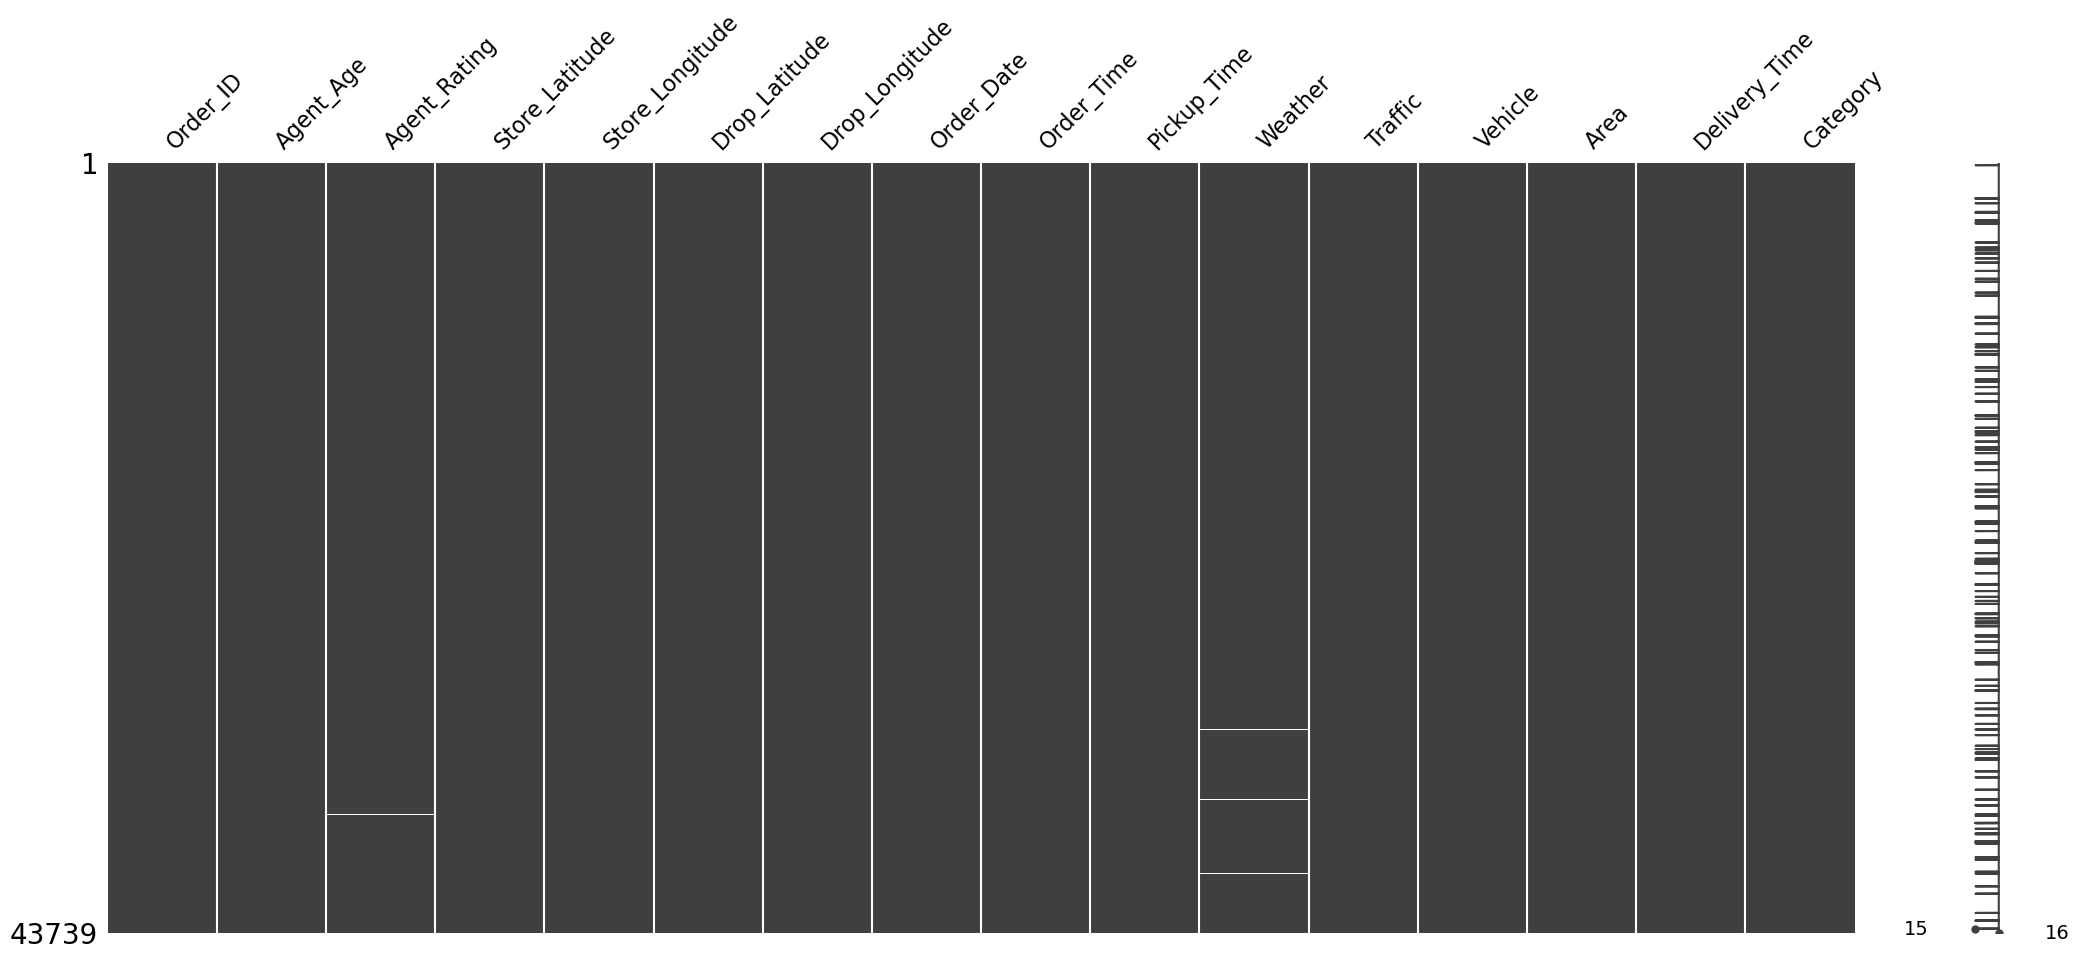

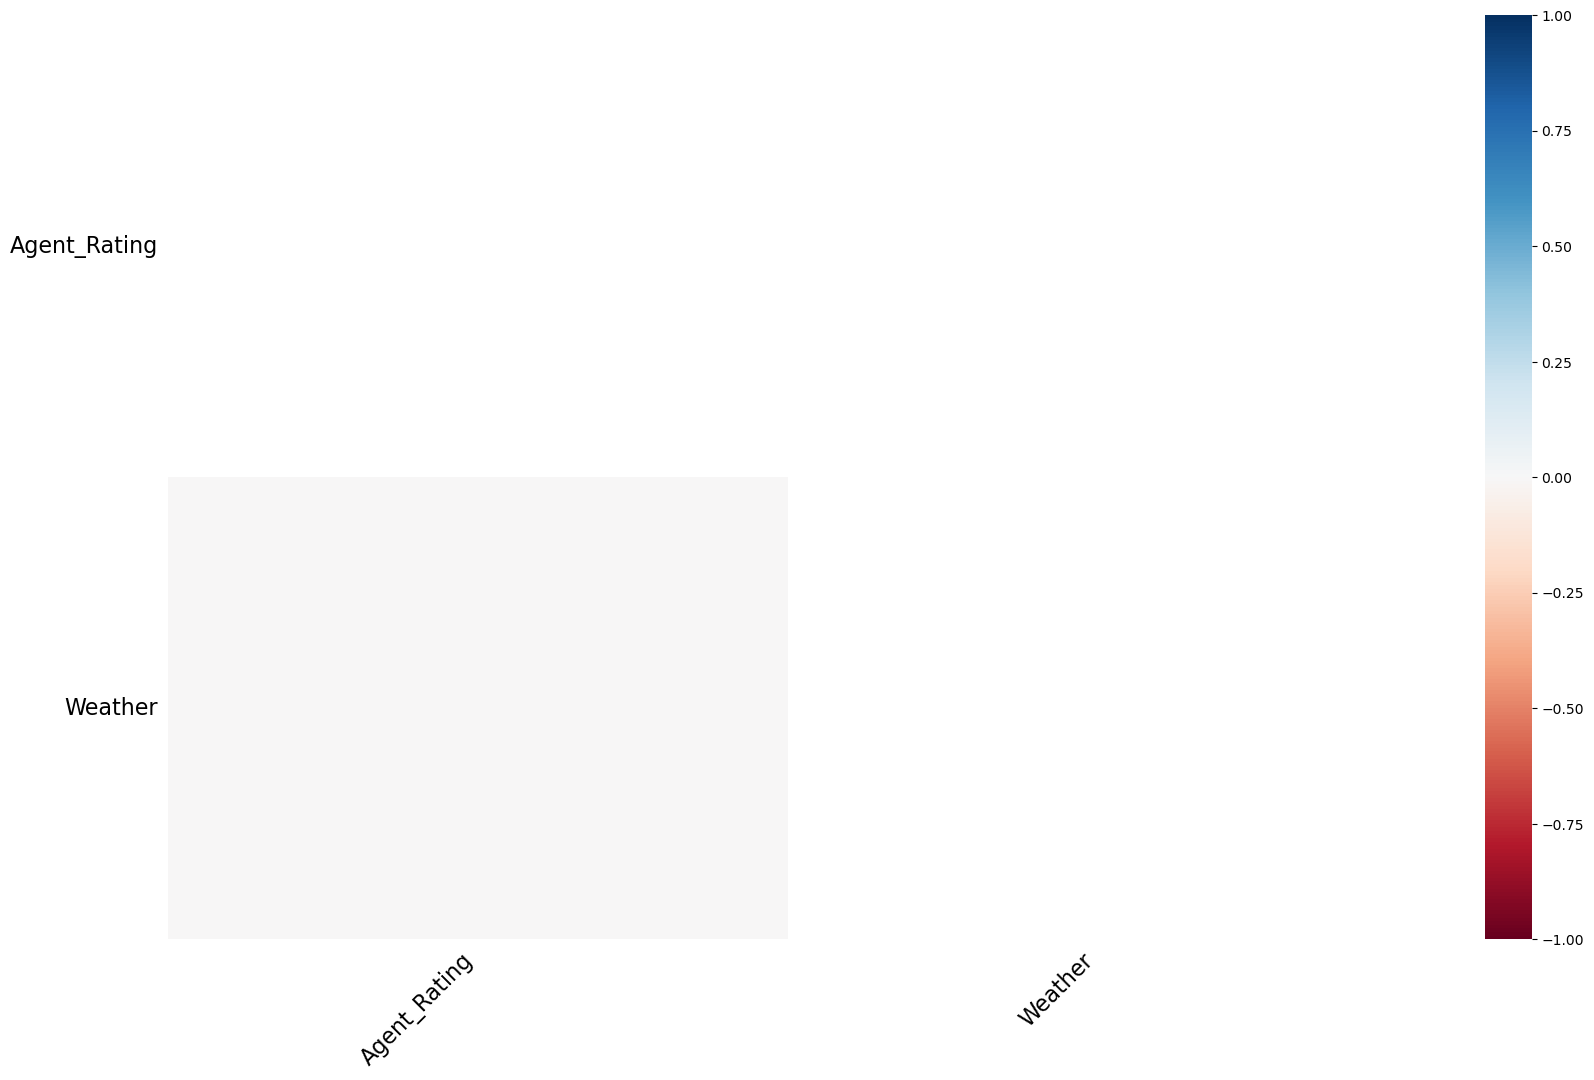

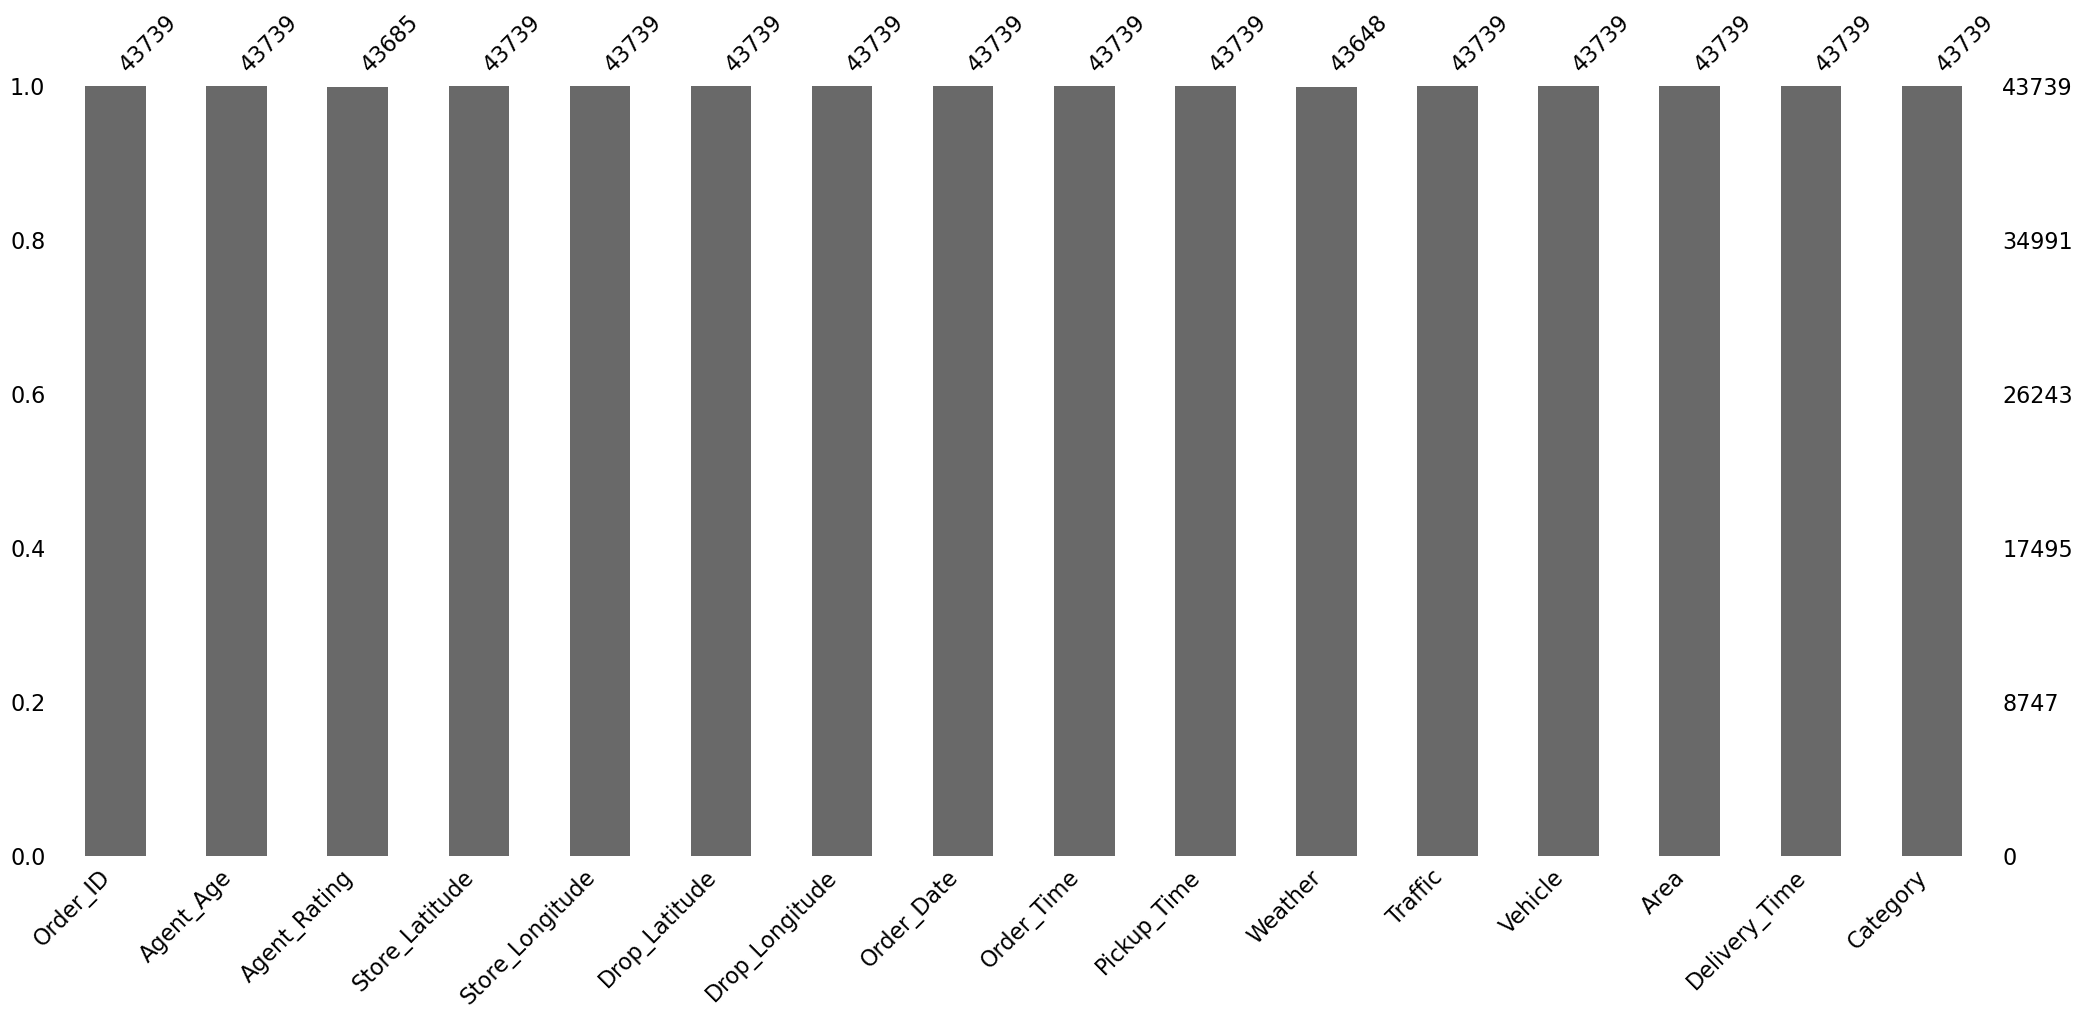

In [8]:
# Visualize missing values as a matrix

msno.matrix(amzDlvry_df)
plt.show()

# Heatmap to see if missingness is correlated

msno.heatmap(amzDlvry_df)
plt.show()

# Bar chart to see missing values count

msno.bar(amzDlvry_df)
plt.show()

### What we know about our dataset:

- There were no duplication of the data.
- The missing values were only seen weather & Agent_Rating.
- The percentage of missing values in weather & Agent_Rating is less than 1%.
- Also, the relation between weather & Agent_Rating missing values is light as well meaning there is close to none relation at all.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
for i,col in enumerate(amzDlvry_df.columns):
    print(f"{i+1}. {col}")

1. Order_ID
2. Agent_Age
3. Agent_Rating
4. Store_Latitude
5. Store_Longitude
6. Drop_Latitude
7. Drop_Longitude
8. Order_Date
9. Order_Time
10. Pickup_Time
11. Weather
12. Traffic
13. Vehicle
14. Area
15. Delivery_Time
16. Category


In [10]:
# Dataset Describe
amzDlvry_df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time
count,43739.000000,43685.000000,43739.000000,43739.000000,43739.000000,43739.000000,43739.000000
mean,29.567137,4.633780,17.210960,70.661177,17.459031,70.821842,124.905645
std,5.815155,0.334716,7.764225,21.475005,7.342950,21.153148,51.915451
min,15.000000,1.000000,-30.902872,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.933298,73.170283,12.985996,73.280000,90.000000
50%,30.000000,4.700000,18.551440,75.898497,18.633626,76.002574,125.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.104095,160.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,270.000000


### Variables Description

- Order_ID: Unique identifier for each order.
- Agent_Age: Age of the delivery agent.
- Agent_Rating: Rating of the delivery agent.
- Store_Latitude/Longitude: Geographic location of the store.
- Drop_Latitude/Longitude: Geographic location of the delivery address.
- Order_Date/Order_Time: Date and time when the order was placed.
- Pickup_Time: Time when the delivery agent picked up the order.
- Weather: Weather conditions during delivery.
- Traffic: Traffic conditions during delivery.
- Vehicle: Mode of transportation used for delivery.
- Area: Type of delivery area (Urban/Metropolitan).
- Delivery_Time: Target variable representing the actual time taken for delivery (in hours).
- Category: Category of the product being delivered.


### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for col in amzDlvry_df.columns:
    print(f"{amzDlvry_df[col].value_counts()}\n")

Order_ID
nsyz997960170    1
ialx566343618    1
akqg208421122    1
njpu434582536    1
rjto796129700    1
                ..
uhfs888375680    1
zyvo118176215    1
blhl288691670    1
wcjs752046999    1
lcwn330553507    1
Name: count, Length: 43739, dtype: int64

Agent_Age
35    2262
36    2260
37    2227
30    2226
38    2219
24    2210
32    2202
22    2196
29    2191
33    2187
28    2179
25    2174
34    2166
26    2159
21    2153
27    2150
39    2144
20    2136
31    2120
23    2087
50      53
15      38
Name: count, dtype: int64

Agent_Rating
4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64

Store_Latitude
 0.000000     3505
 26.911378     175
 26.914142     174
 26.902908   

categorical variables:
- Weather
- Traffic
- Vehicle
- Area
- Category

## 3. ***Data Wrangling***

### Dropping Null Values and Type Conversion

In [12]:
# handling missing values
# since the missing values percentage in the dataframe is less than 1% we'll remove the rows where values are missing
amzDlvry_df = amzDlvry_df.dropna().reset_index(drop=True)

# Type Conversion

# 1. Order_Date
amzDlvry_df["Order_Date"] = pd.to_datetime(amzDlvry_df["Order_Date"])

# 2. Order_Time
amzDlvry_df["Order_Time"] = pd.to_datetime(amzDlvry_df["Order_Time"], format = "%H:%M:%S").dt.time

# Pickup_Time
amzDlvry_df["Pickup_Time"] = pd.to_datetime(amzDlvry_df["Pickup_Time"], format = "%H:%M:%S").dt.time

### Mapping Cities

In [13]:
# Locates the adress based on latitude & Longitude
geolocator = Nominatim(user_agent="geoapi")

In [14]:
# takes lat + lon → returns (city, state)
def get_city(long, lat):
    try:
        location = geolocator.reverse(f"{long}, {lat}", language = 'en')
        address = location.raw["address"]
        return address.get("city") or  address.get("town") or address.get("village")
    except:
        return None

#### A. Store/Warehouse Cities

In [15]:
unique_store_coords = pd.read_csv("storeCityCoords.csv") # the commented code was ran to genrate this dataset

In [16]:
# # getting unique coordinates of Store_Lat
# unique_store_coords = amzDlvry_df[["Store_Latitude", "Store_Longitude"]].drop_duplicates().reset_index(drop = True)
# unique_store_coords.info()

In [17]:
# # stores cities where the stores are at.
# cities = [] 

# # iterate therough the unique_drop_coords 
# for i in range(len(unique_store_coords)):
    
#     lat = unique_store_coords.loc[i, "Store_Latitude"] # latitude 
#     lon = unique_store_coords.loc[i, "Store_Longitude"] # Longitude
#     city = get_city(lat, lon) # returns city based on lat and lon
#     print(i, ":", city) # prints the cooresponding city
#     time.sleep(1)   # prevent blocking (important!)
#     cities.append(city) # appending city to the cities
    
# # Add results as new column
# unique_store_coords["Store_City"] = cities

In [18]:
unique_store_coords.head()

,Store_Latitude,Store_Longitude,Store_City
0,22.745049,75.892471,Indore
1,12.913041,77.683237,Bengaluru
2,12.914264,77.678400,Bengaluru
3,11.003669,76.976494,Coimbatore
4,12.972793,80.249982,NaN


#### B. Drop Cities

In [19]:
unique_drop_coords = pd.read_csv("dropCityCoords.csv")  # the commented code was ran to genrate this dataset

In [20]:
# # getting unique coordinates of Store_Lat
# unique_drop_coords = amzDlvry_df[["Drop_Latitude", "Drop_Longitude"]].drop_duplicates().reset_index(drop = True)
# unique_drop_coords.info()

In [21]:
# # stores cities where productrs are delivered 
# cities = []

# # iterate therough the unique_drop_coords 
# for i in range(len(unique_drop_coords)):
#     lat = unique_drop_coords.loc[i, "Drop_Latitude"] # latitude
#     lon = unique_drop_coords.loc[i, "Drop_Longitude"] # Longitude
#     city = get_city(lat, lon) # returns city based on lat and lon
#     cities.append(city) # appendind  city to the list cities
#     print(i, ":", city) # prints the cooresponding city
#     time.sleep(1)   # prevent blocking (important!)
    
# # Add results as new column
# unique_drop_coords["Drop_City"] = cities

In [22]:
unique_drop_coords.head()

,Drop_Latitude,Drop_Longitude,Store_City
0,22.765049,75.912471,Indore
1,13.043041,77.813237,Chimandahalli
2,12.924264,77.688400,Bengaluru
3,11.053669,77.026494,Coimbatore
4,13.012793,80.289982,Chennai


### Distance Covered For Delivery

In [23]:
def haversine(lat1, lon1, lat2, lon2):

    R = 6371 # Earth's Radius in km

    # convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # haversine formula
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = np.arcsin(np.sqrt(a))
    return 2 * R * c

In [24]:
amzDlvry_df["Distance"] = amzDlvry_df.apply(
    lambda row: haversine(row["Store_Latitude"], row["Store_Longitude"],
                          row["Drop_Latitude"], row["Drop_Longitude"]), axis=1
)

### Delivery Speed 

In [25]:
def Delv_speed(dist, time):
    return dist/time

In [26]:
amzDlvry_df["Speed"] = amzDlvry_df.apply(
    lambda row: Delv_speed(row["Distance"], row["Delivery_Time"]), axis=1
)

In [27]:
amzDlvry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43594 entries, 0 to 43593
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         43594 non-null  object        
 1   Agent_Age        43594 non-null  int64         
 2   Agent_Rating     43594 non-null  float64       
 3   Store_Latitude   43594 non-null  float64       
 4   Store_Longitude  43594 non-null  float64       
 5   Drop_Latitude    43594 non-null  float64       
 6   Drop_Longitude   43594 non-null  float64       
 7   Order_Date       43594 non-null  datetime64[ns]
 8   Order_Time       43594 non-null  object        
 9   Pickup_Time      43594 non-null  object        
 10  Weather          43594 non-null  object        
 11  Traffic          43594 non-null  object        
 12  Vehicle          43594 non-null  object        
 13  Area             43594 non-null  object        
 14  Delivery_Time    43594 non-null  int64

In [28]:
amzDlvry_df.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Delivery_Time,Distance,Speed
count,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594,43594.000000,43594.000000,43594.000000
mean,29.555719,4.635287,17.244769,70.768898,17.461540,70.832489,2022-03-13 16:48:28.143322624,124.916433,26.756143,0.281053
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,2022-02-11 00:00:00,10.000000,1.465067,0.005653
25%,25.000000,4.500000,12.933298,73.170283,12.986054,73.280000,2022-03-04 00:00:00,90.000000,4.663432,0.044123
50%,30.000000,4.700000,18.554382,75.898497,18.633934,76.002471,2022-03-15 00:00:00,125.000000,9.220419,0.072432
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.102309,2022-03-27 00:00:00,160.000000,13.682165,0.113923
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,270.000000,6884.726399,375.245853
std,5.760689,0.313827,7.690005,21.128773,7.338199,21.128940,NaN,51.941975,299.640228,4.021750


### All manipulations and insights found:

- Since the null values that were found in ***Agent_Rating***, ***Traffic*** & ***Weather***  was less than 1%, the rows were dropped.
- Type conversion of ***Order_Date***, ***Order_Time*** & ***Pickup_Time*** were performed.
- Crafted two new dataframes ***Store_coords*** & ***Drop_coords*** which stores coordinates(Latitude & Longitude) and respective cities.
- Engineered two features, ***Distance*** & ***Speed***.
- ***Distance:*** Distance between store and drop location in kilometers.
- ***Speed:*** Speed --- > Distance/DeliveryTime 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Average Delivery Speed by City Tier

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9628\1095670746.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
C:\Users\Workspace\AppData\Local\Temp\ipykernel_9628\1095670746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


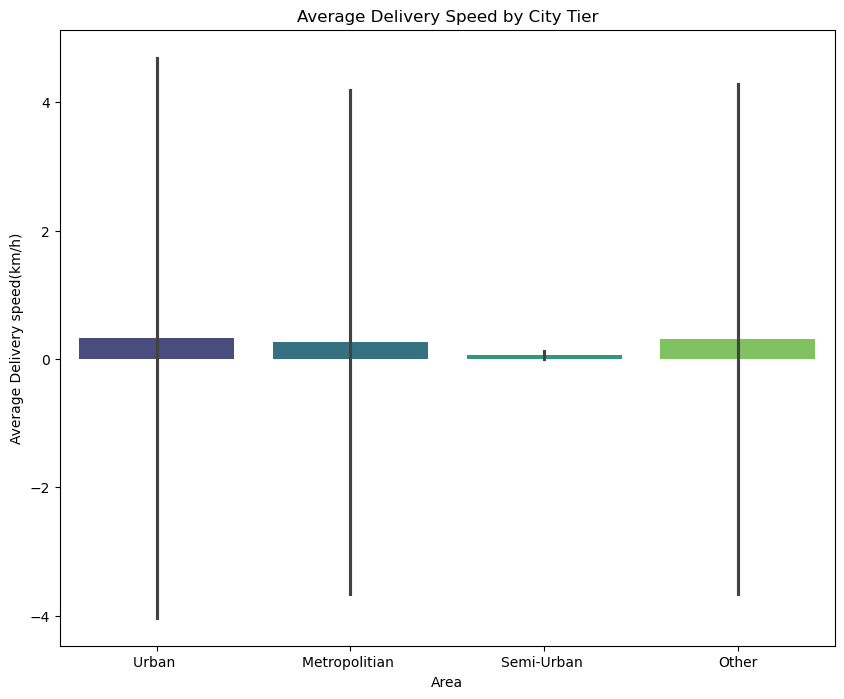

In [29]:
# Chart - 1 visualization code
plt.figure(figsize=(10,8))
sns.barplot(
    x = "Area",
    y = "Speed",
    data = amzDlvry_df,
    estimator = "mean",
    ci = "sd",
    palette = 'viridis'
)
plt.title("Average Delivery Speed by City Tier")
plt.xlabel("Area")
plt.ylabel("Average Delivery speed(km/h)")
plt.show()

##### 1. Why did you pick the specific chart?

This will showcase the average speed deliveries over different areas(Urban, Metropolitian, Semi-urban, Other)

##### 2. What is/are the insight(s) found from the chart?

**Insights:**
- The average speed of delivery is least in semi-urban areas.
- Urban & Other are relatively same.
- metropolitian areas are relatively faster than Urban & Other in terms of delivery speed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,  these insights might help in following specs of buisness growth:
- help focus on areas where delay in deliveries happen
- suitable methods to be leveraged to tackle problems causing delay in delivery.

Yes, these insights shows that as we move to cities with advancements (Urban & metropolitian) due to traffic, cogetion the delivery gets delayed, which is a positive business impact.

#### Chart - 2 Average Delivery Speed Across Different Traffic Conditions

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9628\2914059921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


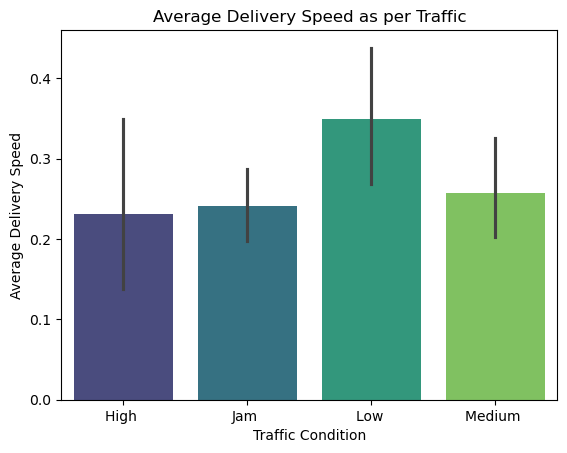

In [30]:
# Chart - 2 visualization code
sns.barplot(
    x = "Traffic",
    y = "Speed",e
    data = amzDlvry_df,
    estimator = "mean",
    palette = "viridis",
)
plt.title("Average Delivery Speed as per Traffic")
plt.xlabel("Traffic Condition")
plt.ylabel("Average Delivery Speed")
plt.show()

##### 1. Why did you pick the specific chart?

To validate how much the traffic impacts the delivery time.

##### 2. What is/are the insight(s) found from the chart?

- The insights show Obscure behaviour, As the traffic gets higher & jams, the average  delivery times gets high which is quite obious.
- ***Low*** traffic does the fastest delivery among other traffic conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can be leveraged to improve the delivery time promise by the company.

#### Chart - 3 Average Delivery Speed Accross Diffrent Weather

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9628\1007143556.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


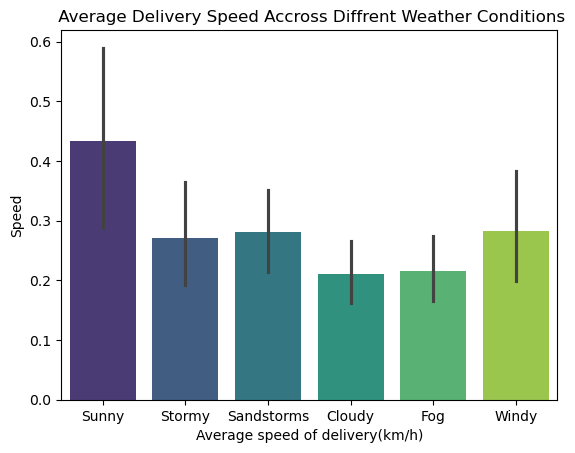

In [31]:
# Chart - 3 visualization code
sns.barplot(
    x = "Weather",
    y = "Speed",
    estimator = "mean",
    palette = 'viridis',
    data = amzDlvry_df
)
plt.title(" Average Delivery Speed Accross Diffrent Weather Conditions")
plt.xlabel("Weather")
plt.xlabel("Average speed of delivery(km/h)")
plt.show()

##### 1. Why did you pick the specific chart?

To clear the doubt whether ***'Weather'*** effects delivery speed or not.

##### 2. What is/are the insight(s) found from the chart?

- ***Sunny*** weather has has maximum average delivery speed. Indicating that in sunny days the delivery fast.
- ***Windy***, ***Stormy*** and ***Sandstorms*** has relatively simillar speed.
- ***Cloudy*** & ***Fog*** show lower speed, which might be due to respective weather condition

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,this might help in forcasting the the delivery time based on weather.

#### Chart - 4 Average Delivery Speed Across Different Category of Product 

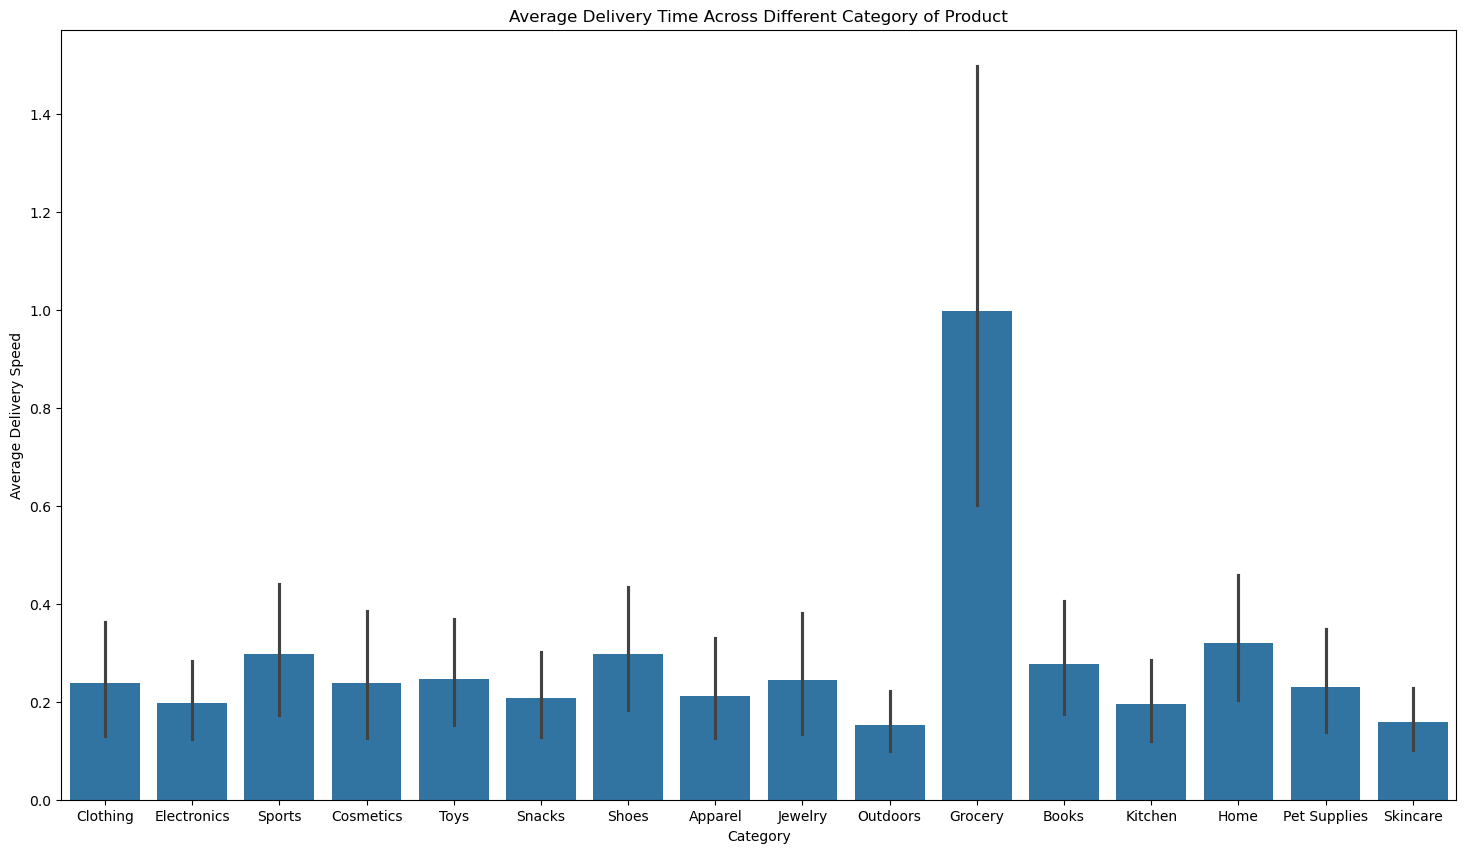

In [32]:
# Chart - 4 visualization code

plt.figure(figsize = (18,10))
sns.barplot(
    x = "Category",
    y = "Speed",
    data = amzDlvry_df,
    estimator = "mean"
)

plt.title("Average Delivery Time Across Different Category of Product")
plt.xlabel("Category")
plt.ylabel("Average Delivery Speed")
plt.show()

##### 1. Why did you pick the specific chart?

This chart will show if the delivery speed of products also driven by category of the product or not. How different category products behave.

##### 2. What is/are the insight(s) found from the chart?

- The delivery speed appears to be high in the product category ***Grocery***. Indicating groceries are delivered faster, as thier demand is generally high due their daily basis use in large population. 
- Every other product category appears to be almost on the same plane.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insight will help obatain certain categories delivery time, In areas of lower delivery speed, certain measure could be brainstormed and improve the delivery service.

#### Chart - 5 Average Delivery Speed Per Vehicle

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9628\2580652844.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


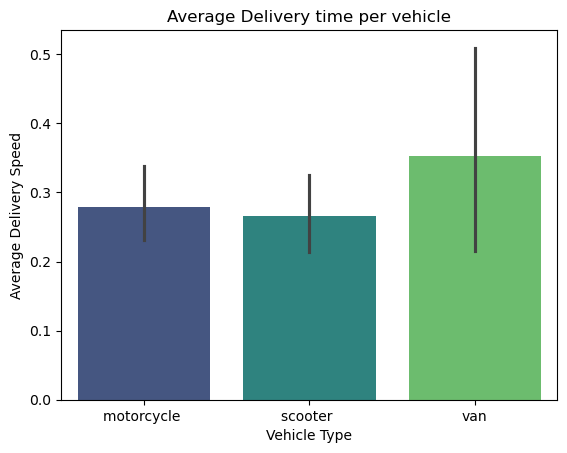

In [33]:
# Chart - 5 visualization code
sns.barplot(
    x = "Vehicle",
    y = "Speed",
    data = amzDlvry_df,
    estimator = "mean",
    palette = "viridis",
)
plt.title("Average Delivery time per vehicle")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Speed")
plt.show()

##### 1. Why did you pick the specific chart?

This chart clearifies how much the vehicle type holds importance and effects delivery time.

##### 2. What is/are the insight(s) found from the chart?

- Motorcycle & scooter i.e. two wheelers have much less average delivery time comapared to van which is a four wheeler.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this char helps identify the type of vehicle to go for, for redecution in delivery time.

#### Chart - 6 Age vs Delivery Speed

Text(0, 0.5, 'Average Delivery Speed')

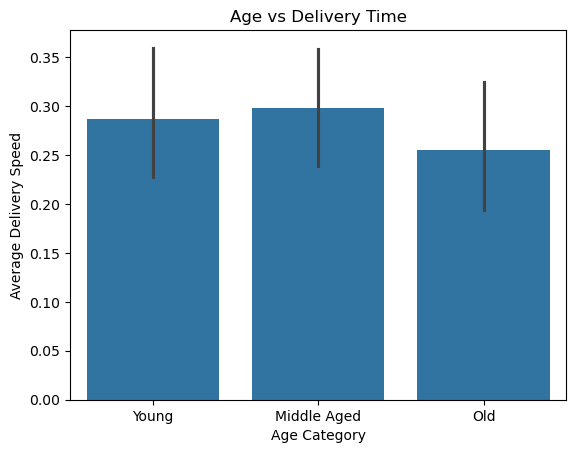

In [34]:
# Chart - 6 visualization code
quantiles = amzDlvry_df['Agent_Age'].quantile([0, 1/3, 2/3, 1]).unique()
df = amzDlvry_df.copy()
df["Age_Category"] = pd.cut(amzDlvry_df["Agent_Age"], bins = quantiles, labels = ["Young", "Middle Aged","Old"], include_lowest = True)

sns.barplot(
    x = "Age_Category",
    y = "Speed",
    data  = df,
    estimator = "mean"
)
plt.title("Age vs Delivery Time")
plt.xlabel("Age Category")
plt.ylabel("Average Delivery Speed")

- Young : 20-26
- middle Aged: 26-33
- Old: 33-39 

##### 1. Why did you pick the specific chart?

This chart will help us understand how the age of the dilivery agent impacts the delivery of the product.

##### 2. What is/are the insight(s) found from the chart?

- Middle aged agents delivery fastest.
- Younger agents deliver slighly less fast than middle agents
- Older Agents takes longer time to deliver than younger and middle aged agents.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes!
The buisness will be able to pick perfect fits for delivery agents based on performance.

#### Chart - 7 Agent Rating and Their Delivery Speed

[2.5 4.6 4.8 5. ]


Text(0, 0.5, 'Average Delivery Speed')

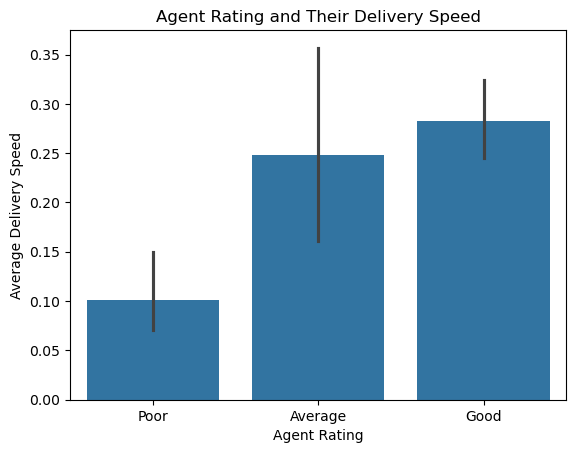

In [35]:
# Chart - 7 visualization code
quantile = amzDlvry_df["Agent_Rating"].quantile([0, 1/3, 2/3, 1]).unique() 
print(quantile)
df["Agent_Rating_Catg"] = pd.cut(df["Agent_Rating"], bins = [0,2.5,4,5], labels = ["Poor","Average","Good"], include_lowest = True)
sns.barplot(
    x = "Agent_Rating_Catg",
    y = "Speed",
    data = df,
    estimator = "mean",
)
plt.title("Agent Rating and Their Delivery Speed")
plt.xlabel("Agent Rating")
plt.ylabel("Average Delivery Speed")


##### 1. Why did you pick the specific chart?

The chart identifies and differentiate the ratings based on delivery performance. 

##### 2. What is/are the insight(s) found from the chart?

- Agents rated **Poor(0-2.5)** deliver at slowest speed.
- Agents rated **Average(2.5-4)** deliver at good speed but quite lesser speed than Good(4-5) rated agents.
- Agents rated **Good(4-5)** deliver at best speed among all other.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, it'll help improve the delivery predictions, as well as identify underperforming agents.

#### Chart - 8 Average Delivery Speed Across Different Days of the Week(Order Day)

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9628\1463759715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_speed_by_day.index, y=avg_speed_by_day.values, palette="viridis")


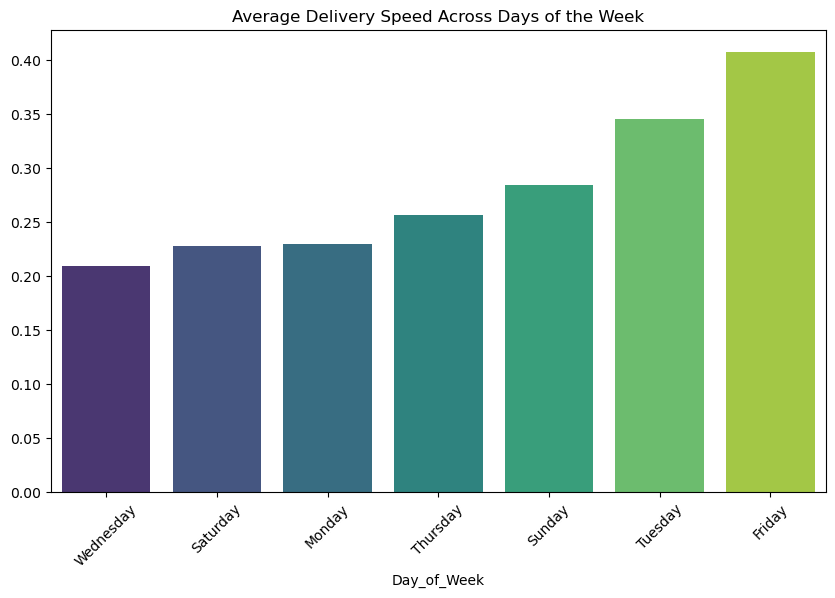

In [36]:
# Chart - 8 visualization code

df["Day_of_Week"] = df["Order_Date"].dt.day_name()

# Average delivery speed by day of week
avg_speed_by_day = df.groupby("Day_of_Week")["Speed"].mean().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_speed_by_day.index, y=avg_speed_by_day.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Average Delivery Speed Across Days of the Week")
plt.show()


##### 1. Why did you pick the specific chart?

To compare average delivery speed across different days clearly and spot trends easily.

##### 2. What is/are the insight(s) found from the chart?

- Friday has the highest speed.
- Wednesday the lowest. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by applying Friday’s methods on slower days. Wednesday’s low speed may hurt satisfaction if not fixed.

#### Chart - 9 Average Delivery Speed Across Different Times of the Day

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9628\2192021432.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Time_of_Day", y="Speed", data=df, ci=None, palette="Set2")
C:\Users\Workspace\AppData\Local\Temp\ipykernel_9628\2192021432.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Time_of_Day", y="Speed", data=df, ci=None, palette="Set2")


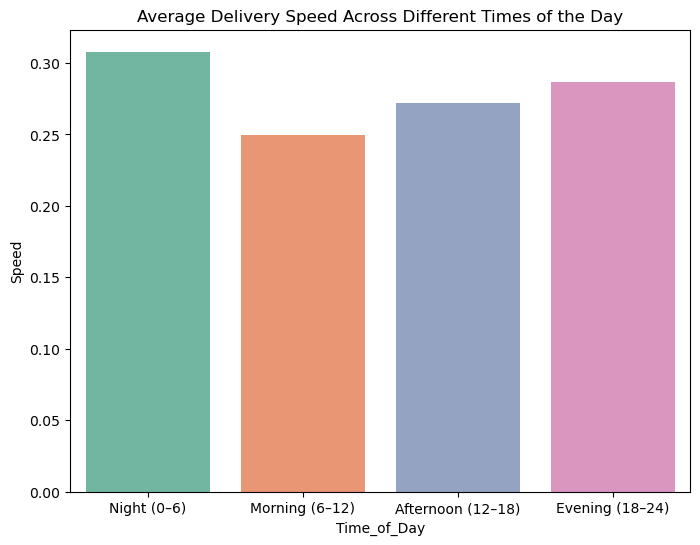

In [37]:
# Chart - 9 visualization code 

# Add delivery time (in hours) to order date to get actual delivery datetime
df["Delivery_Datetime"] = df["Order_Date"] + pd.to_timedelta(df["Delivery_Time"], unit="h")

# Extract time of day
df["Hour"] = df["Delivery_Datetime"].dt.hour

bins = [0, 6, 12, 18, 24]
labels = ["Night (0–6)", "Morning (6–12)", "Afternoon (12–18)", "Evening (18–24)"]
df["Time_of_Day"] = pd.cut(df["Hour"], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8,6))
sns.barplot(x="Time_of_Day", y="Speed", data=df, ci=None, palette="Set2")
plt.title("Average Delivery Speed Across Different Times of the Day")
plt.show()

##### 1. Why did you pick the specific chart?

To easily compare delivery speed across different times of the day.

##### 2. What is/are the insight(s) found from the chart?

Night has the highest delivery speed, while morning is the slowest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, focusing on night-time strategies can improve other time slots. Morning delays may reduce satisfaction.

#### Chart - 10 Distribution of Delivery Speed

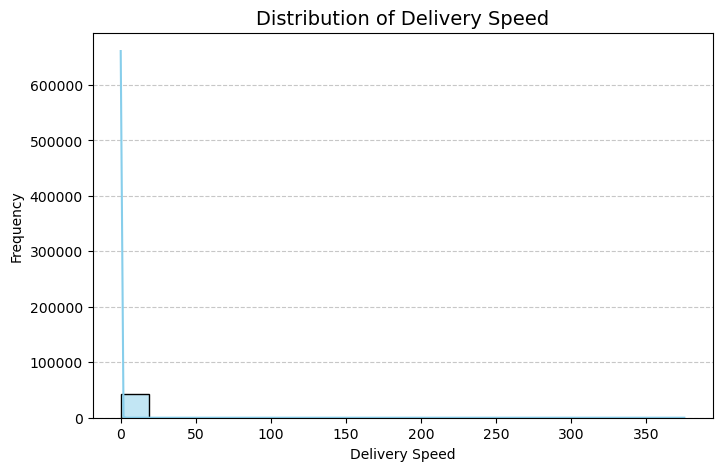

In [38]:
# Chart - 10 visualization code
plt.figure(figsize=(8,5))
sns.histplot(df['Speed'], kde=True, bins=20, color='skyblue', edgecolor='black')

plt.title("Distribution of Delivery Speed", fontsize=14)
plt.xlabel("Delivery Speed")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?

To check if delivery speeds follow a normal distribution or are skewed.

##### 2. What is/are the insight(s) found from the chart?

Data is highly right-skewed; most deliveries are very fast, few are very slow.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps identify outliers causing delays; improving them can boost consistency.

#### Chart - 11 Violin Plot of Agent Age vs Delivery Speed

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9628\603192389.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Age_Group", y="Speed", data=df, palette="Set2")


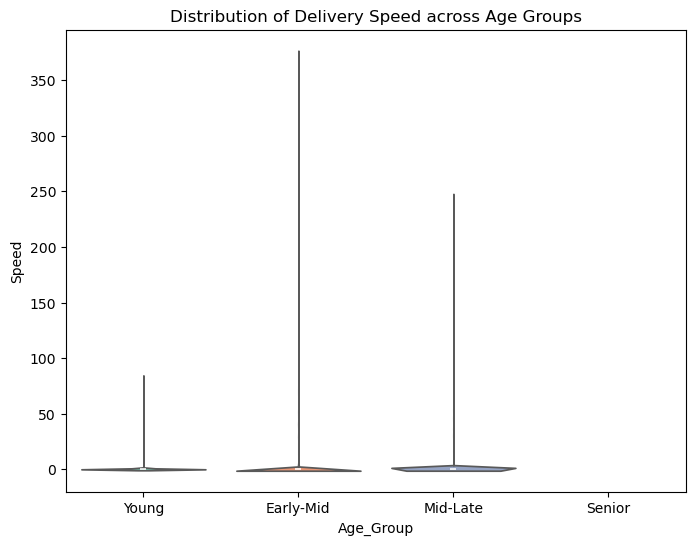

In [39]:
# Chart - 11 visualization code
# Bin ages into categories
bins = [18, 25, 35, 50, 70]
labels = ["Young", "Early-Mid", "Mid-Late", "Senior"]
df["Age_Group"] = pd.cut(amzDlvry_df["Agent_Age"], bins=bins, labels=labels, right=False)

# Violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x="Age_Group", y="Speed", data=df, palette="Set2")
plt.title("Distribution of Delivery Speed across Age Groups")
plt.show()


##### 1. Why did you pick the specific chart?

A violin plot was chosen to show both the distribution shape and density of delivery speeds across different age groups clearly.

##### 2. What is/are the insight(s) found from the chart?

The Early-Mid and Mid-Late groups show wider spreads with extreme values, while Young and Senior groups have tighter, more stable speed ranges.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps identify which age groups show consistent delivery performance. High variability in certain groups may require targeted training or workload adjustments to improve efficiency.

#### Chart - 12 Boxplot of Delivery Speed per Area

C:\Users\Workspace\AppData\Local\Temp\ipykernel_9628\4215243954.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Area", y="Speed", data=amzDlvry_df, palette="Set2")


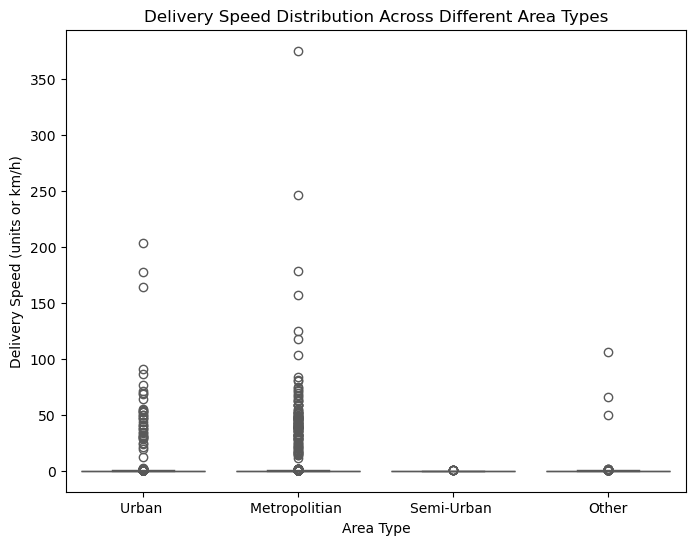

In [40]:
# Chart - 12 visualization code
plt.figure(figsize=(8,6))
sns.boxplot(x="Area", y="Speed", data=amzDlvry_df, palette="Set2")

plt.title("Delivery Speed Distribution Across Different Area Types")
plt.xlabel("Area Type")
plt.ylabel("Delivery Speed (units or km/h)")
plt.show()


##### 1. Why did you pick the specific chart?

A boxplot effectively shows delivery speed distribution across different area types, highlighting medians, spread, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Urban and Metropolitan areas have many outliers with very high speeds, suggesting inconsistencies or data errors. Semi-Urban and Other areas show more stable delivery speeds.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help identify data or process issues in certain regions, improving delivery accuracy. Unchecked outliers could mislead performance analysis and harm decision-making.

#### Chart - 13 Scatterplot: Delivery Distance vs Delivery Speed

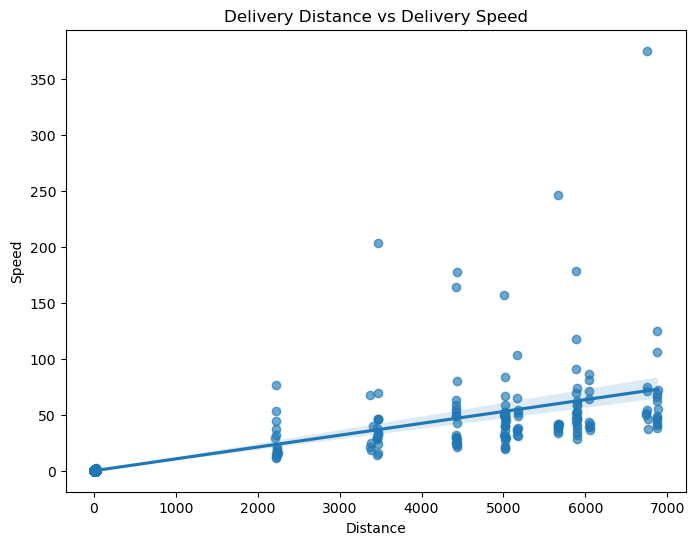

In [41]:
# Chart - 13 visualization code'
plt.figure(figsize=(8,6))
sns.regplot(x="Distance", y="Speed", data=amzDlvry_df, scatter_kws={"alpha":0.65})
plt.title("Delivery Distance vs Delivery Speed")
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot with a trendline is ideal to visualize the relationship between two continuous variables (Distance and Speed) and to check if they follow a positive or negative trend.

##### 2. What is/are the insight(s) found from the chart?

- There is a positive correlation: as delivery distance increases, delivery speed also tends to increase.
- However, there are some outliers where speed is unusually high for certain distances.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Positive impact: Understanding that longer distances are usually matched with higher delivery speeds can help optimize resource allocation and ensure timely deliveries.

- Potential negative insight: The outliers (very high speeds) may indicate risky driving or inefficiencies, which could affect safety, fuel costs, or service quality if not addressed.

#### Chart - 14 - Heatmap of Correlations

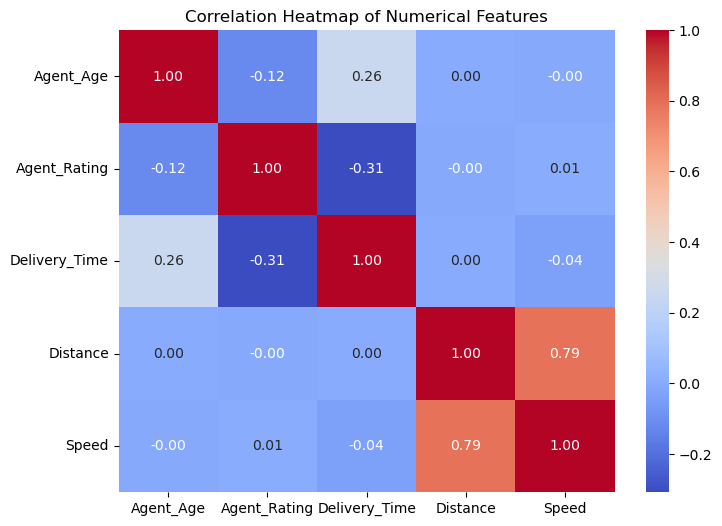

In [42]:
# Correlation Heatmap visualization code

# Select numerical features
num_cols = ["Agent_Age","Agent_Rating","Delivery_Time","Distance","Speed"]

corr = amzDlvry_df[num_cols].corr()
plt.figure(figsize= (8,6))
sns.heatmap(corr, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

##### 1. Why did you pick the specific chart?

To quickly visualize relationships among multiple numerical features using an easy-to-interpret color-coded view.

##### 2. What is/are the insight(s) found from the chart?

Distance and Speed are strongly correlated, Agent_Rating negatively correlates with Delivery_Time, while other features show weak or negligible correlations.

#### Chart - 15 - Pair Plot

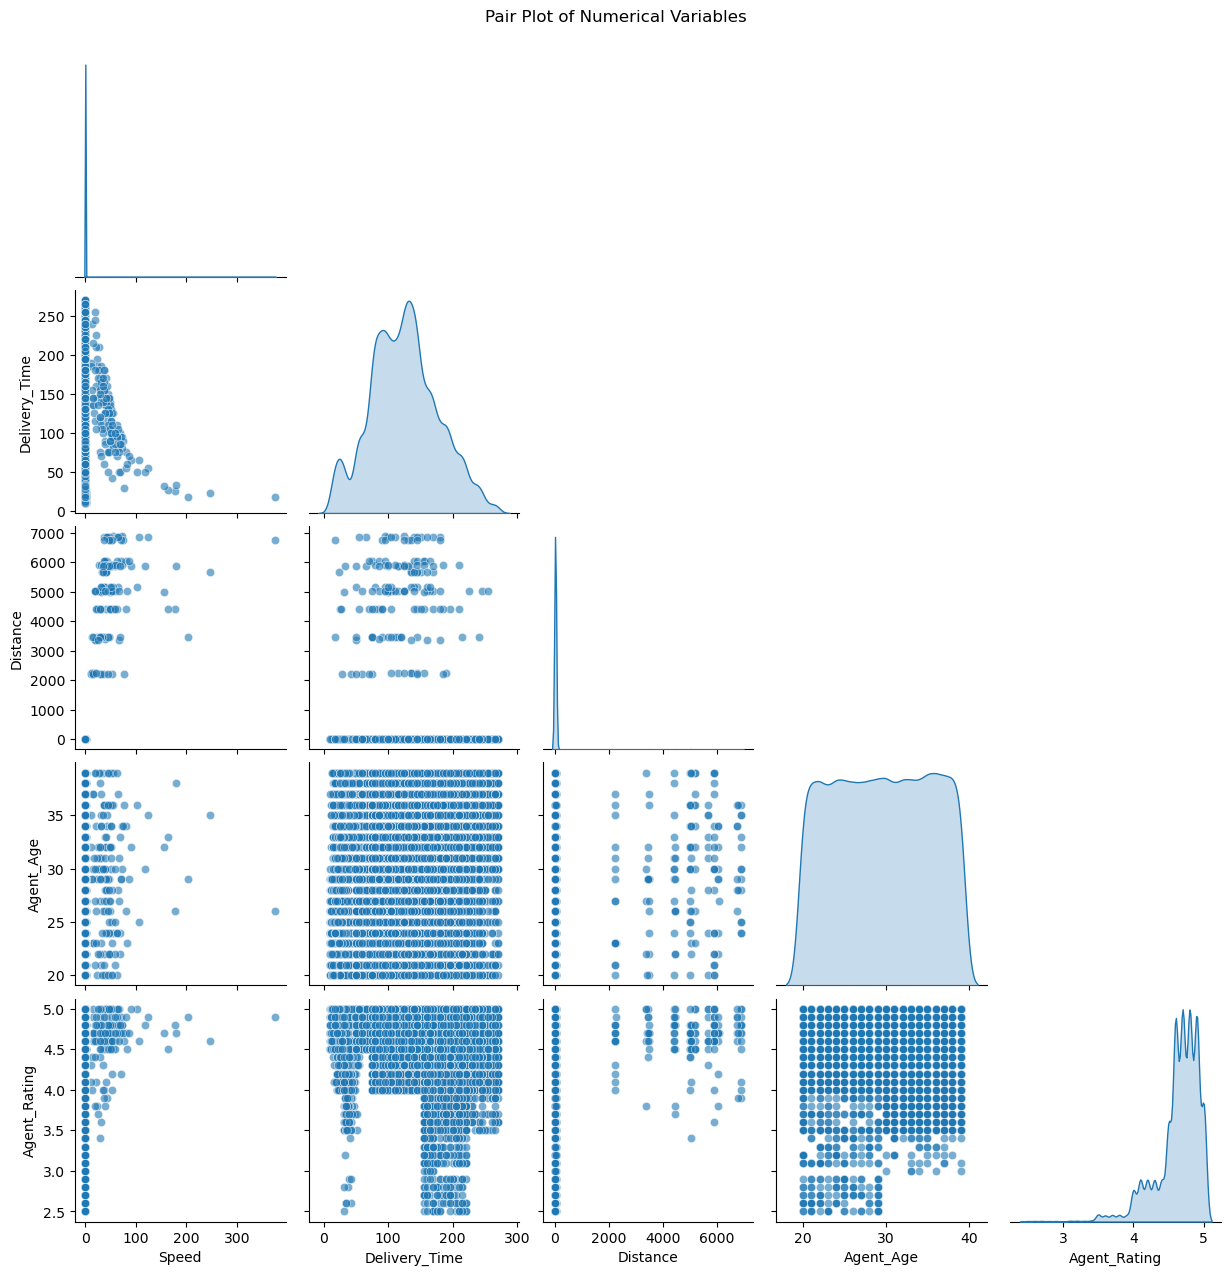

In [43]:
# Pair Plot visualization code

num_cols = ["Speed", "Delivery_Time", "Distance", "Agent_Age", "Agent_Rating"]

sns.pairplot(amzDlvry_df[num_cols], diag_kind="kde", corner=True, plot_kws={"alpha":0.6})
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot helps visualize relationships between multiple numerical variables at once, revealing possible correlations, clusters, or patterns across features like Speed, Distance, and Delivery Time.

##### 2. What is/are the insight(s) found from the chart?

A clear inverse relationship is seen between Delivery Speed and Delivery Time, while Distance also shows some positive association with Delivery Time. Other variables, like Agent Age and Rating, appear weakly correlated with delivery metrics.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): There is no significant difference in average delivery time across different area types (Urban, - Semi-Urban, Metropolitan, etc.).
- Alternative Hypothesis (H₁): The average delivery time significantly differs across different area types.

#### 2. Perform an appropriate statistical test.

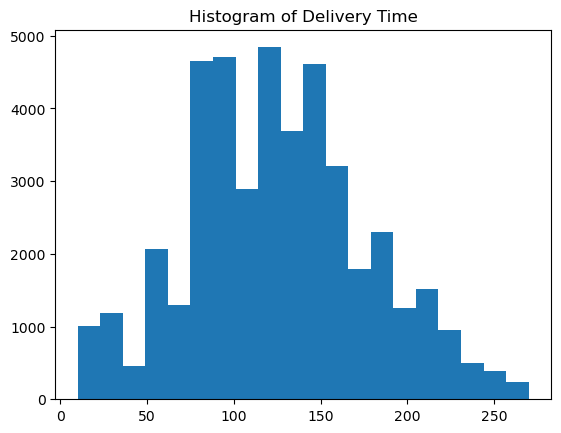

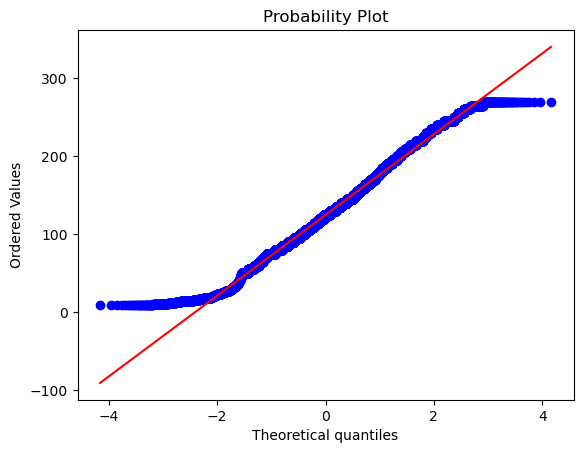

p-value = 9.107560426547613e-42
Data is NOT normal


D:\Workspace\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 43594.
  res = hypotest_fun_out(*samples, **kwds)


In [44]:
# normal distribution testingplt.hist(amzDlvry_df['Delivery_Time'], bins=20)

# Visual test
plt.hist(amzDlvry_df['Delivery_Time'], bins=20)
plt.title('Histogram of Delivery Time')
plt.show()

# Q-Q plot
stats.probplot(amzDlvry_df['Delivery_Time'], dist="norm", plot=plt)
plt.show()

# Statistical test 
stat, p = shapiro(amzDlvry_df['Delivery_Time'])
print('p-value =', p)
if p > 0.05:
    print("Data is roughly normal")
else:
    print("Data is NOT normal")


In [45]:
# Perform Statistical Test to obtain P-Value
groups = [group['Delivery_Time'].values for name, group in amzDlvry_df.groupby('Area')]
stat, p = kruskal(*groups)

print('Kruskal-Wallis H-test statistic =', stat)
print('p-value =', p)

if p < 0.05:
    print("Significant difference between groups → reject null hypothesis")
else:
    print("No significant difference → fail to reject null hypothesis")


Kruskal-Wallis H-test statistic = 1870.2592731305965
p-value = 0.0
Significant difference between groups → reject null hypothesis


##### Which statistical test have you done to obtain P-Value?

Kruskal-wallis H-test

##### Why did you choose the specific statistical test?

It was numerical vs categorical hypothesis and also the data was not normal.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): Delivery distance has no significant relationship with delivery time.
- Alternative Hypothesis (H₁): Delivery distance has a significant positive relationship with delivery time.


#### 2. Perform an appropriate statistical test.

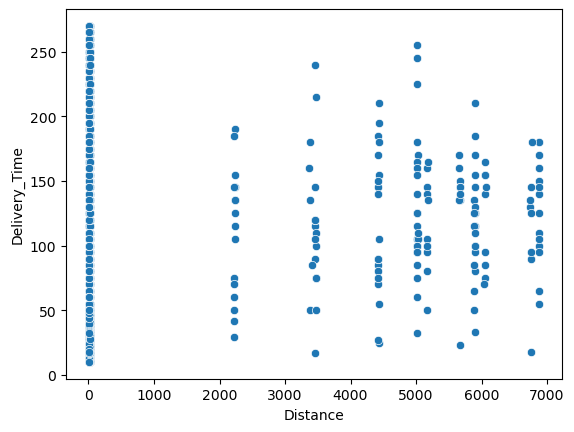

D:\Workspace\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 43594.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=np.float64(0.9921306687826581), pvalue=np.float64(9.107560426547613e-42)),
 ShapiroResult(statistic=np.float64(0.03701943206187153), pvalue=np.float64(2.1710656657473935e-158)))

In [46]:
# normality test

sns.scatterplot(x='Distance', y='Delivery_Time', data=amzDlvry_df)
plt.show()
shapiro(amzDlvry_df['Delivery_Time']), shapiro(amzDlvry_df['Distance'])


In [47]:
# Perform Statistical Test to obtain P-Value
corr, p = spearmanr(amzDlvry_df['Distance'], amzDlvry_df['Delivery_Time'])
print("Spearman correlation =", corr, ", p-value =", p)

Spearman correlation = 0.2818598010053938 , p-value = 0.0


##### Which statistical test have you done to obtain P-Value?

Spearman test

##### Why did you choose the specific statistical test?

It was numerical vs numerical hypothesis testing, and the data was not normal.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): Delivery agent rating has no significant effect on delivery time.
- Alternative Hypothesis (H₁): Higher-rated delivery agents tend to deliver orders faster.

#### 2. Perform an appropriate statistical test.

In [48]:
# normalisation test
shapiro(amzDlvry_df['Agent_Rating'])
shapiro(amzDlvry_df['Delivery_Time'])

D:\Workspace\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 43594.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9921306687826581), pvalue=np.float64(9.107560426547613e-42))

In [49]:
# Perform Statistical Test to obtain P-Value
corr, p = spearmanr(amzDlvry_df['Agent_Rating'], amzDlvry_df['Delivery_Time'])
print("Spearman correlation =", corr, ", p-value =", p)

Spearman correlation = -0.26009879060182556 , p-value = 0.0


##### Which statistical test have you done to obtain P-Value?

Spearman test

##### Why did you choose the specific statistical test?

It was numerical vs numerical hypothesis testing, and the data was not normal.

## ***6. Feature Engineering & Data Pre-processing***

In [50]:
amzDlvry_df.head()

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,Distance,Speed
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,3.025149,0.025210
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,20.183530,0.122324
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.552758,0.011944
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,7.790401,0.074194
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,6.210138,0.041401


### 1. Handling Outliers

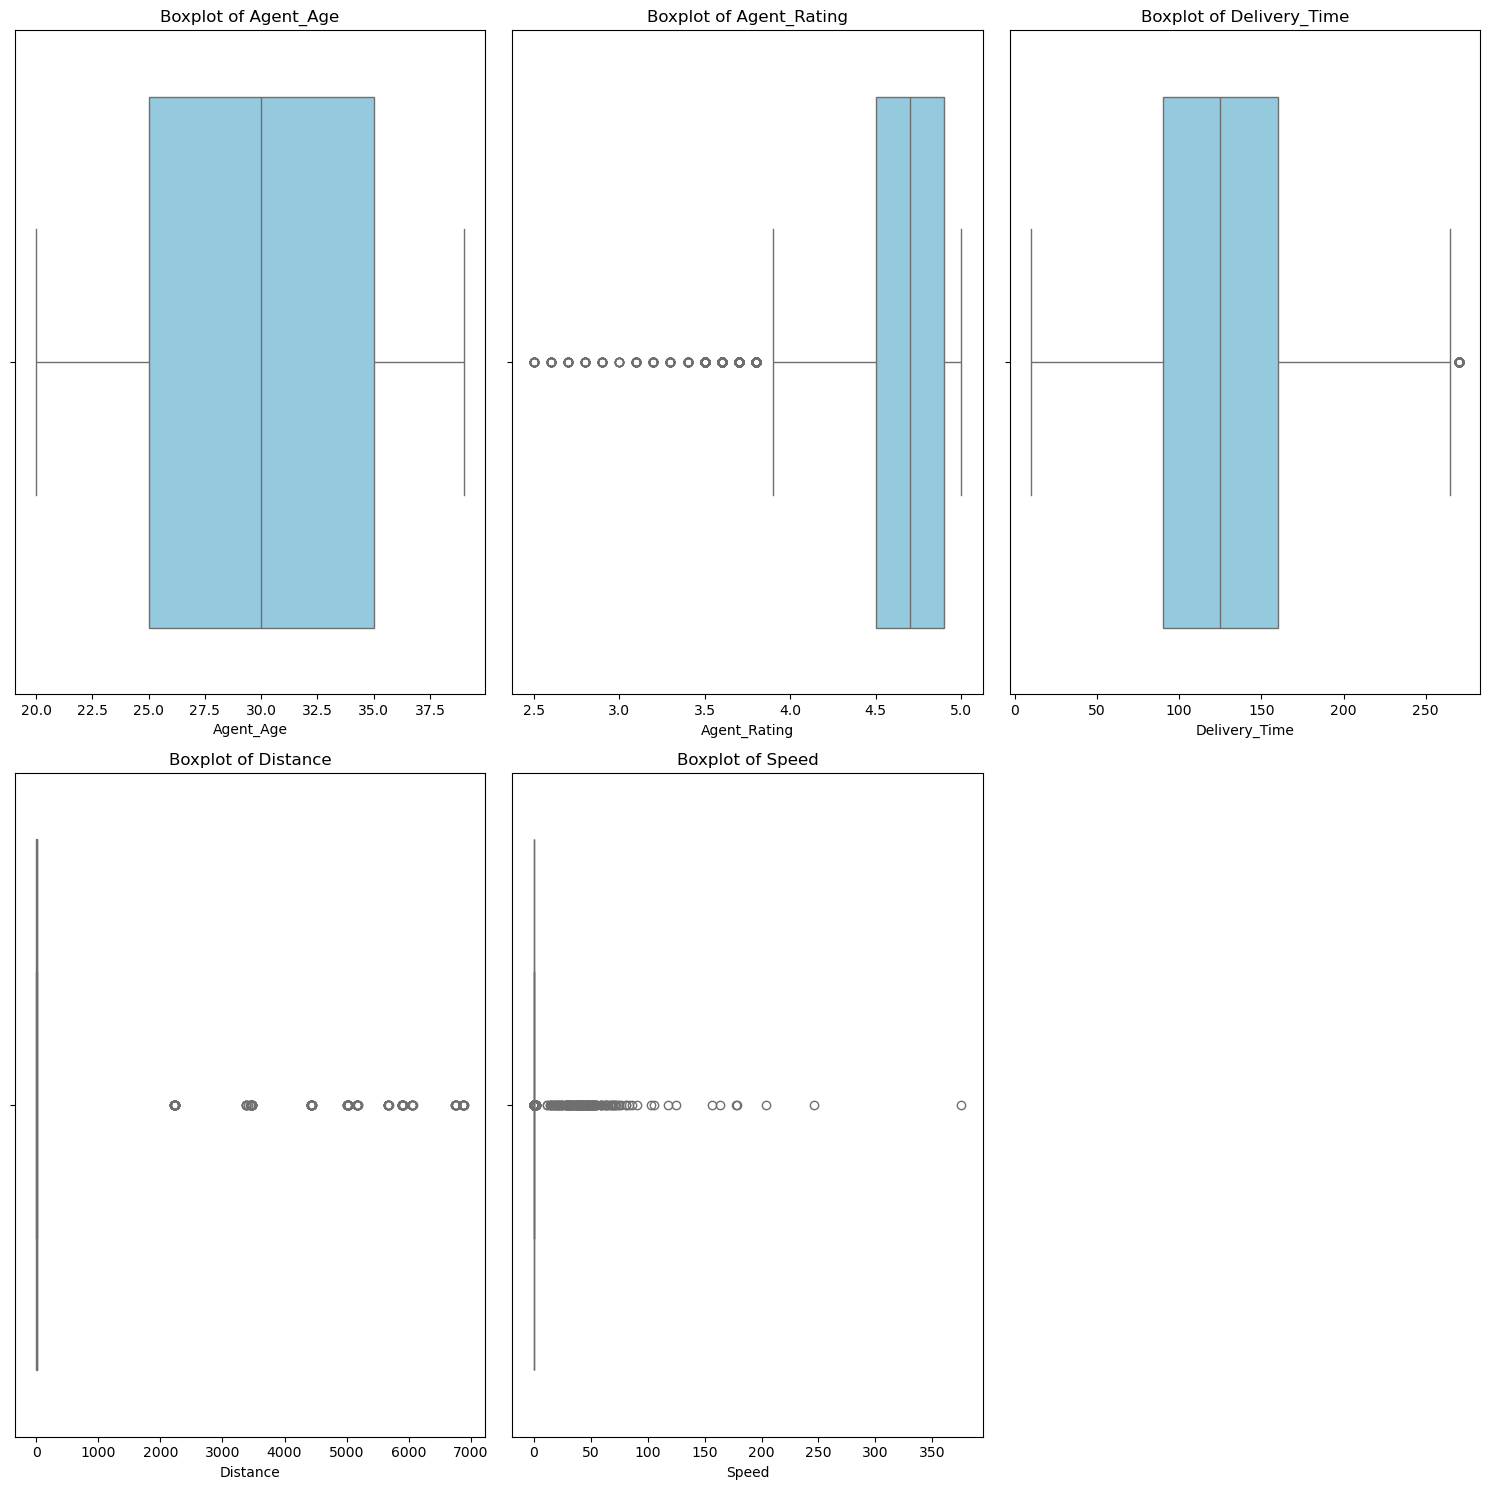

In [51]:
# Visulising outliers

num_cols = ["Agent_Age","Agent_Rating","Delivery_Time","Distance","Speed"]

plt.figure(figsize= (15,15))
rows = math.ceil(len(num_cols)/3) 
for i,col in enumerate(num_cols,1):
    plt.subplot(rows,3,i)
    sns.boxplot(data = amzDlvry_df, x = col, color = "skyblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()
    

In [52]:
# using IQR method to handle outliers

def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_limit, lower_limit,np.where(df[column] > upper_limit, upper_limit, df[column]))

    return df

outlier_cols = ["Agent_Rating", "Distance", "Speed"]

for col in outlier_cols:
    amzDlvry_df = treat_outliers_iqr(amzDlvry_df, col)

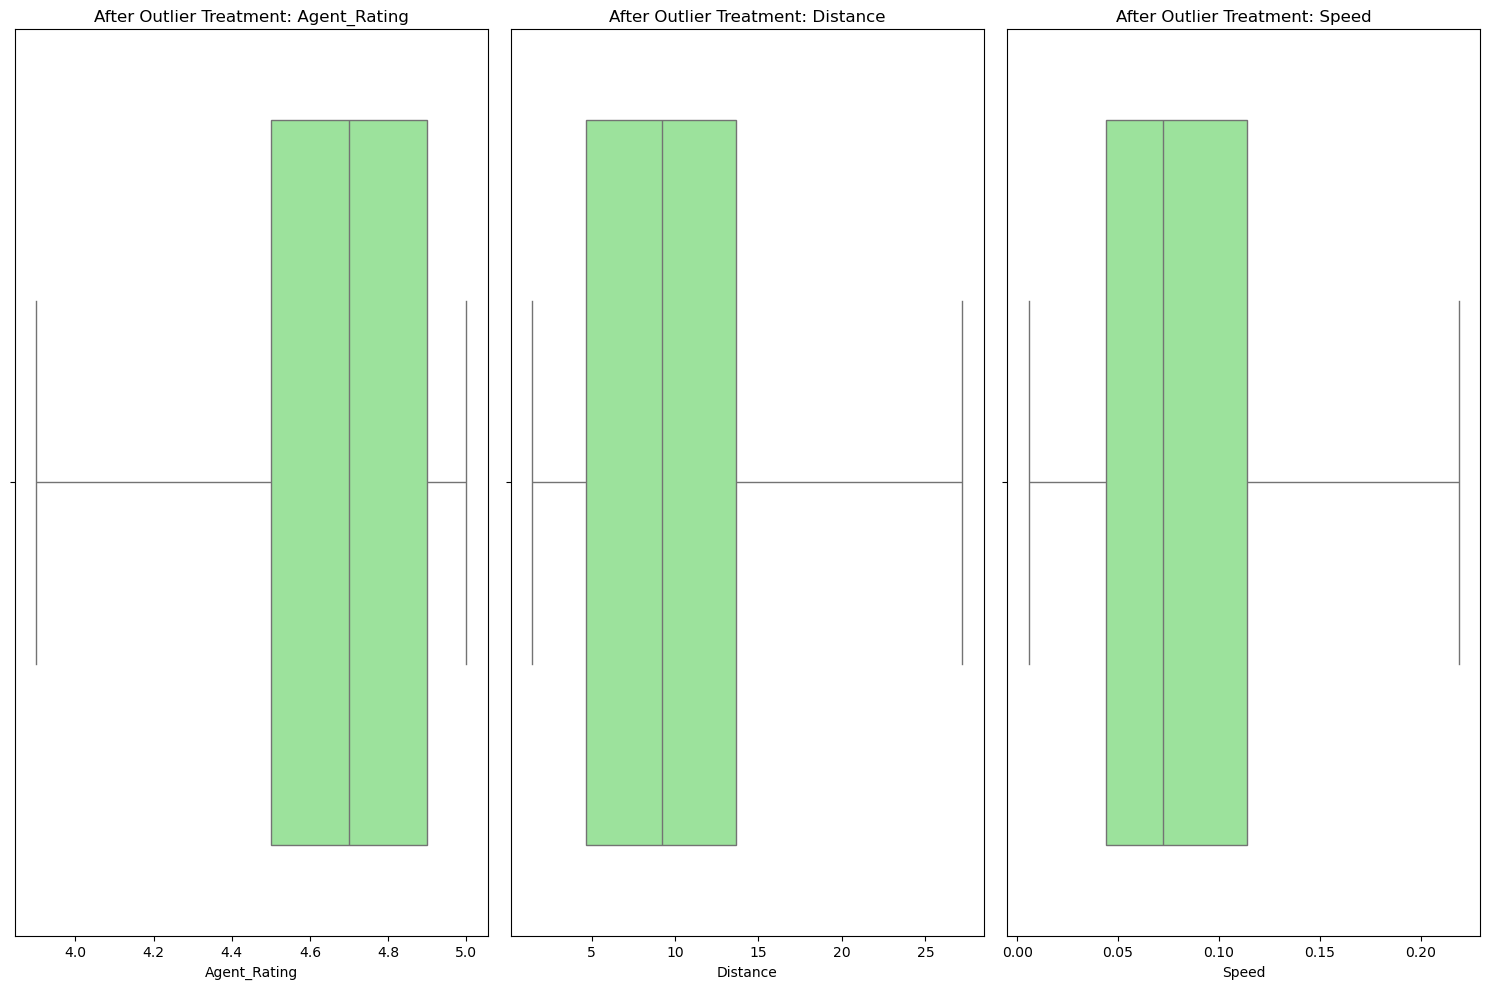

In [53]:
plt.figure(figsize=(15,10))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=amzDlvry_df, x=col, color='lightgreen')
    plt.title(f"After Outlier Treatment: {col}")
plt.tight_layout()
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were detected in numerical features using boxplots. Columns such as **Distance**, **Speed**, and **Agent_Rating** exhibited extreme values that could skew model learning. The Interquartile Range (IQR) method was applied to cap values beyond 1.5×IQR from Q1 and Q3. This ensured that all numeric features remained within a realistic range without losing essential variation in the data.

### 2. Categorical Encoding

categorical variables:
- Weather	
- Traffic
- Vehicle
- Area
- Category

In [54]:
amzDlvry_df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
Distance           0
Speed              0
dtype: int64

In [55]:
print(amzDlvry_df['Traffic'].unique())
print(amzDlvry_df['Area'].unique())

['High ' 'Jam ' 'Low ' 'Medium ']
['Urban ' 'Metropolitian ' 'Semi-Urban ' 'Other']


In [56]:
# Remove leading/trailing spaces
amzDlvry_df['Traffic'] = amzDlvry_df['Traffic'].str.strip()
amzDlvry_df['Area'] = amzDlvry_df['Area'].str.strip()

# label Encoding categorical columns
traffic_order = {'Low': 0, 'Medium': 1, 'High': 2, 'Jam': 3}
area_order = {'Other': 0, 'Urban': 1, 'Semi-Urban': 2,'Metropolitian': 3}

amzDlvry_df["Traffic"] = amzDlvry_df["Traffic"].map(traffic_order)
amzDlvry_df["Area"] = amzDlvry_df["Area"].map(area_order)

In [57]:
amzDlvry_df.isnull().sum()

Order_ID           0
Agent_Age          0
Agent_Rating       0
Store_Latitude     0
Store_Longitude    0
Drop_Latitude      0
Drop_Longitude     0
Order_Date         0
Order_Time         0
Pickup_Time        0
Weather            0
Traffic            0
Vehicle            0
Area               0
Delivery_Time      0
Category           0
Distance           0
Speed              0
dtype: int64

In [58]:
# One-Hot Encoding
one_hot_cols = ["Weather","Vehicle","Category"]
amzDlvry_encoded = pd.get_dummies(amzDlvry_df, columns=one_hot_cols, drop_first=True)


In [59]:
# Scale numeric columns only
amzDlvry_encoded.isnull().sum()


Order_ID                 0
Agent_Age                0
Agent_Rating             0
Store_Latitude           0
Store_Longitude          0
Drop_Latitude            0
Drop_Longitude           0
Order_Date               0
Order_Time               0
Pickup_Time              0
Traffic                  0
Area                     0
Delivery_Time            0
Distance                 0
Speed                    0
Weather_Fog              0
Weather_Sandstorms       0
Weather_Stormy           0
Weather_Sunny            0
Weather_Windy            0
Vehicle_scooter          0
Vehicle_van              0
Category_Books           0
Category_Clothing        0
Category_Cosmetics       0
Category_Electronics     0
Category_Grocery         0
Category_Home            0
Category_Jewelry         0
Category_Kitchen         0
Category_Outdoors        0
Category_Pet Supplies    0
Category_Shoes           0
Category_Skincare        0
Category_Snacks          0
Category_Sports          0
Category_Toys            0
d

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Categorical Encoding**

Two encoding techniques were used:

- Ordinal (Manual Mapping): Applied to Traffic and Area as they have a natural order (e.g., low < medium < high < jam). This preserves the real-world hierarchy.

- One-Hot Encoding: Applied to Vehicle_Type, Weather, and Order_Category since these are nominal variables with no inherent order.

This hybrid approach ensures correct representation while avoiding unnecessary feature expansion.

In [60]:
# Expand Contraction

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [61]:
amzDlvry_encoded.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Traffic', 'Area', 'Delivery_Time',
       'Distance', 'Speed', 'Weather_Fog', 'Weather_Sandstorms',
       'Weather_Stormy', 'Weather_Sunny', 'Weather_Windy', 'Vehicle_scooter ',
       'Vehicle_van', 'Category_Books', 'Category_Clothing',
       'Category_Cosmetics', 'Category_Electronics', 'Category_Grocery',
       'Category_Home', 'Category_Jewelry', 'Category_Kitchen',
       'Category_Outdoors', 'Category_Pet Supplies', 'Category_Shoes',
       'Category_Skincare', 'Category_Snacks', 'Category_Sports',
       'Category_Toys'],
      dtype='object')

In [62]:
# Dropping non-numerical columns
amzDlvry_encoded = amzDlvry_encoded.drop(
    columns = ["Order_ID",'Store_Latitude','Store_Longitude','Drop_Latitude',
               'Drop_Longitude',"Order_Time","Order_Date","Pickup_Time"]
)

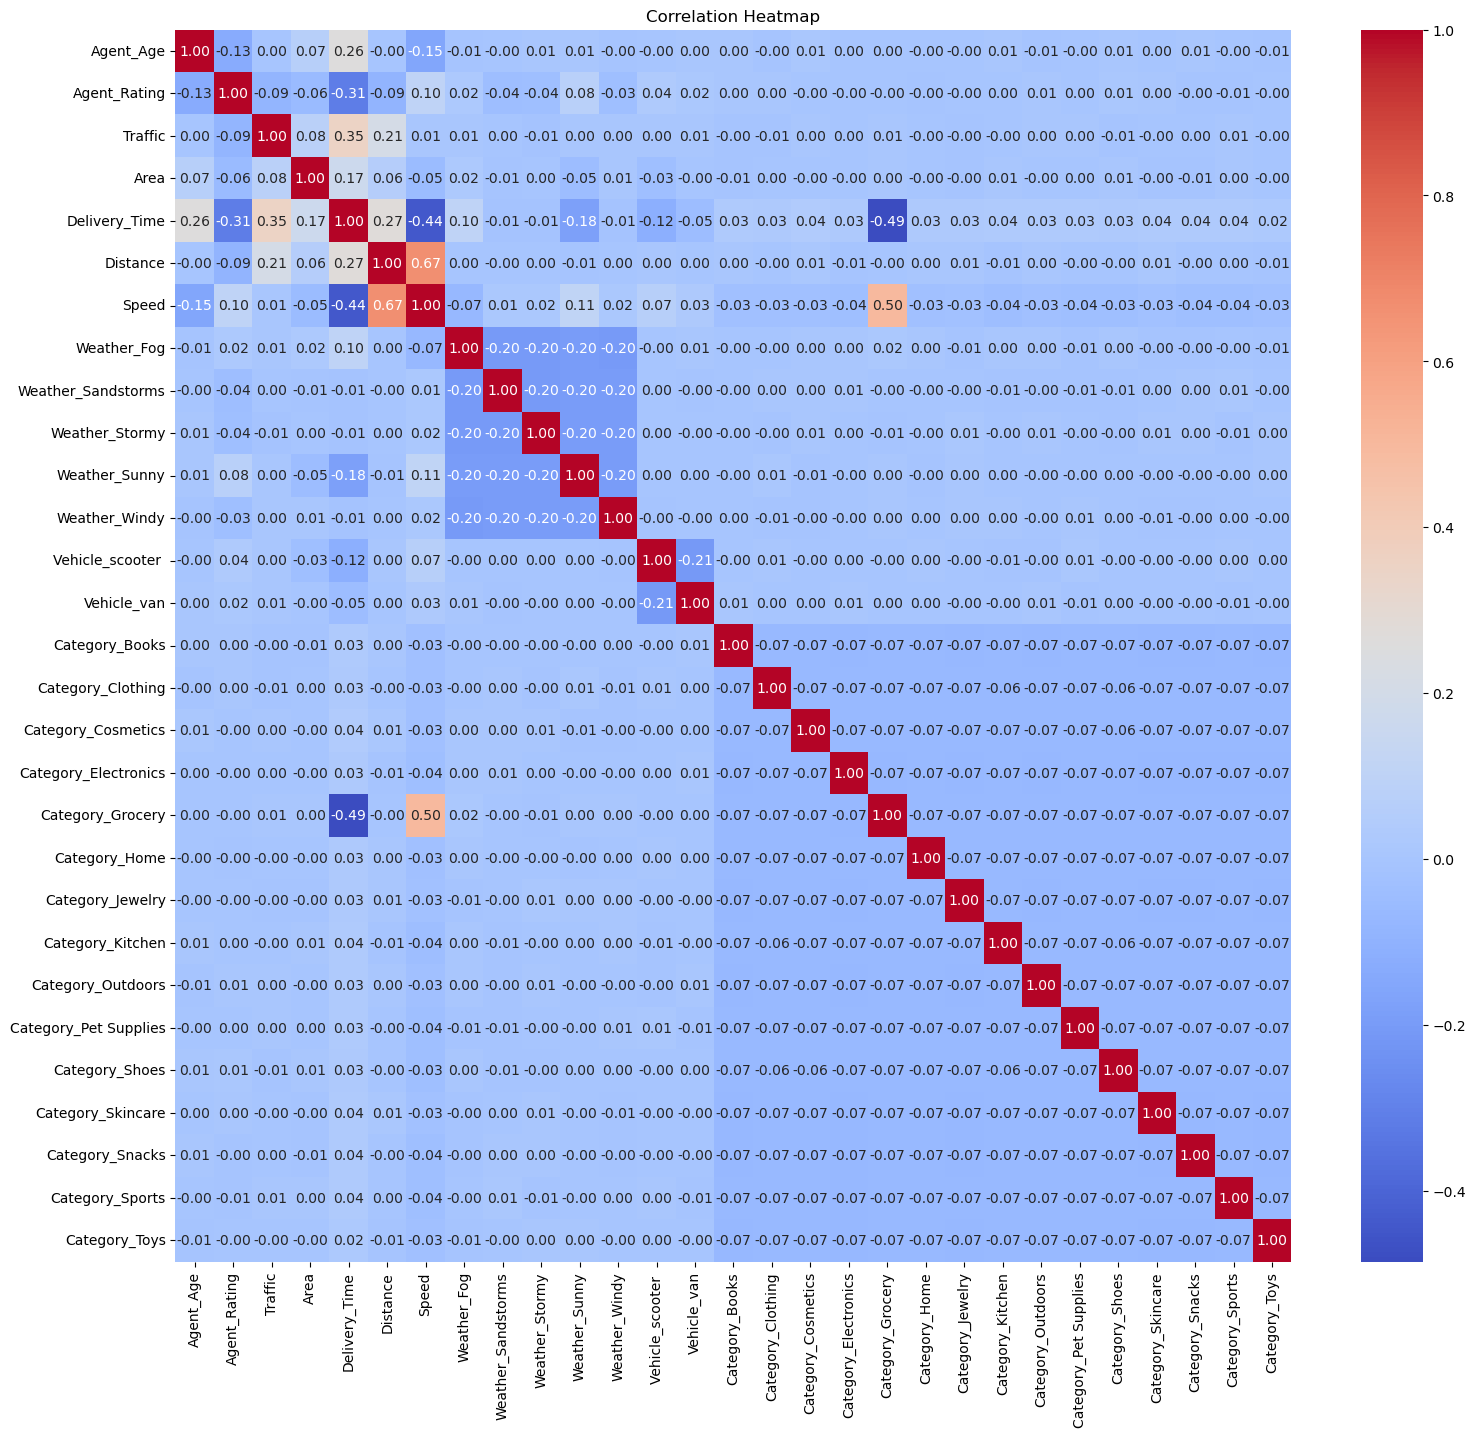

In [63]:
plt.figure(figsize=(18,16))
sns.heatmap(amzDlvry_encoded.corr(), annot = True, cmap='coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

#### 2. Feature Selection

In [64]:
from sklearn.ensemble import RandomForestRegressor


X = amzDlvry_encoded.drop('Delivery_Time', axis=1)
y = amzDlvry_encoded['Delivery_Time']

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

feat_importance = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending = False)
feat_importance.head(10)

Distance            0.241992
Category_Grocery    0.235911
Speed               0.228157
Agent_Rating        0.152220
Traffic             0.098833
Agent_Age           0.028021
Weather_Sunny       0.012353
Vehicle_scooter     0.000890
Weather_Fog         0.000204
Area                0.000162
dtype: float64

##### What all feature selection methods have you used  and why?

Correlation analysis, domain knowledge (dropped redundant coordinates), and Random Forest feature importance were used to select meaningful features.

##### Which all features you found important and why?

- Speed, Category_Grocery, Distance → major impact on delivery time

- Agent_Rating, Agent_Age → moderate impact

- Weather & Vehicle type → minimal impact

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No additional transformation was applied because outliers were already handled using IQR capping. This ensures stable feature distributions without distorting the data.

### 5. Data Scaling

In [65]:
amzDlvry_encoded.dtypes

Agent_Age                  int64
Agent_Rating             float64
Traffic                    int64
Area                       int64
Delivery_Time              int64
Distance                 float64
Speed                    float64
Weather_Fog                 bool
Weather_Sandstorms          bool
Weather_Stormy              bool
Weather_Sunny               bool
Weather_Windy               bool
Vehicle_scooter             bool
Vehicle_van                 bool
Category_Books              bool
Category_Clothing           bool
Category_Cosmetics          bool
Category_Electronics        bool
Category_Grocery            bool
Category_Home               bool
Category_Jewelry            bool
Category_Kitchen            bool
Category_Outdoors           bool
Category_Pet Supplies       bool
Category_Shoes              bool
Category_Skincare           bool
Category_Snacks             bool
Category_Sports             bool
Category_Toys               bool
dtype: object

In [66]:
# Scaling numerical columns who have not been encoded
num_cols = ["Agent_Age", "Agent_Rating", "Distance", "Speed"]

scaler = StandardScaler()

# Scale numeric columns only
amzDlvry_scaled = amzDlvry_encoded.copy()
amzDlvry_scaled[num_cols] = scaler.fit_transform(amzDlvry_scaled[num_cols])

# Check
amzDlvry_scaled.head(10)

,Agent_Age,Agent_Rating,Traffic,Area,Delivery_Time,Distance,Speed,Weather_Fog,Weather_Sandstorms,Weather_Stormy,...,Category_Home,Category_Jewelry,Category_Kitchen,Category_Outdoors,Category_Pet Supplies,Category_Shoes,Category_Skincare,Category_Snacks,Category_Sports,Category_Toys
0,1.292270,0.915206,2,1,120,-1.189850,-1.071387,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.771493,-0.521558,3,3,165,1.826526,0.633642,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,-1.138023,-0.880749,0,1,130,-1.448691,-1.304283,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,1.465863,0.196824,1,3,105,-0.352137,-0.211371,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.424309,-0.162367,2,3,150,-0.629942,-0.787118,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,-1.311615,0.556015,3,1,130,-0.911175,-0.891346,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,0.597901,0.196824,3,3,200,1.196619,-0.056739,True,False,False,...,False,False,False,False,False,False,False,False,False,True
7,0.945086,-0.162367,1,3,160,1.830345,0.703139,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,-1.311615,0.556015,3,3,170,1.789958,0.548994,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9,1.118678,-1.599131,3,3,230,0.085627,-0.729229,True,False,False,...,False,False,False,False,False,False,False,False,False,True


##### Which method have you used to scale you data and why?

tandardScaler was used to scale numeric features (Agent_Age, Agent_Rating, Distance, Speed). It standardizes features to have mean = 0 and standard deviation = 1, ensuring that all numeric features contribute equally to the model. This is important for algorithms sensitive to feature magnitude and improves model convergence.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Most features are numeric or one-hot encoded categorical variables, and the total number of features is manageable.

Tree-based models (Random Forest, XGBoost) handle high-dimensional data well.

No severe multicollinearity exists after feature selection and encoding.

### 8. Data Splitting

In [67]:
# Spliting data
x =  amzDlvry_encoded.drop(columns = ["Delivery_Time"], axis =1)
y =  amzDlvry_encoded["Delivery_Time"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state = 42
)


In [68]:
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (34875, 28)
x_test: (8719, 28)
y_train: (34875,)
y_test: (8719,)


##### What data splitting ratio have you used and why?

- An 80:20 train-test split was used.

- 80% training data ensures the model has enough examples to learn patterns effectively.

- 20% testing data provides a reliable evaluation on unseen data to check generalization.

- This is a common and balanced choice for medium-sized datasets like ours.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is not imbalanced because the target variable, Delivery_Time, is continuous rather than categorical. Imbalance issues typically arise in classification tasks where some classes dominate.
In our regression problem, all values of Delivery_Time are numeric, so we do not need special techniques to handle imbalance.

## ***7. ML Model Implementation***

### ML Model 1: Linear Regression

In [69]:
# ML Model - LinearRegression
lr = LinearRegression()

# Fit the Algorithm
lr.fit(x_train,y_train)

# Predict on the model
y_pred_lr = lr.predict(x_test)

In [70]:
# Evalution of the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# printing the results

print(f"MSE: {mae_lr:.3f}")
print(f"RMSE: {rmse_lr:.3f}")
print(f"RSquare : {r2_lr:.3f}")

MSE: 16.041
RMSE: 21.698
RSquare : 0.821


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# (GridSearch CV)
alpha_values = {'alpha':[0.0001,0.001,0.01,0.1,10,50,100]}

ridge = Ridge()
lasso = Lasso(max_iter=10000)

ridge_search = GridSearchCV(ridge, alpha_values, cv = 5, scoring = 'r2')
lasso_search = GridSearchCV(lasso, alpha_values, cv = 5, scoring = 'r2')


ridge_search.fit(x_train, y_train)
lasso_search.fit(x_train, y_train)

print("Best Ridge alpha:", ridge_search.best_params_)
print("Best Ridge R² (CV):", ridge_search.best_score_)

print("\nBest Lasso alpha:", lasso_search.best_params_)
print("Best Lasso R² (CV):", lasso_search.best_score_)


Best Ridge alpha: {'alpha': 0.01}
Best Ridge R² (CV): 0.8290277430944213

Best Lasso alpha: {'alpha': 0.001}
Best Lasso R² (CV): 0.8290349867937931


In [73]:
# Best Model performance
best_model = ridge_search.best_estimator_

# Predict on test set
y_pred_final_lr = best_model.predict(x_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_final_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_final_lr))
r2 = r2_score(y_test, y_pred_final_lr)

print("Final Tuned Linear Regression Performance")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")

Final Tuned Linear Regression Performance
MAE  : 16.042
RMSE : 21.699
R²   : 0.821


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV for tuning alpha in Ridge/Lasso.

Ensures best cross-validated performance and prevents overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### ML Model 2: Random Forest

In [74]:
# Initialize the randomforest model
rf  = RandomForestRegressor()

# fitting the training data set 
rf.fit(x_train,y_train)

# predicting scores
y_pred_rf = rf.predict(x_test)

# Evaluate

mae_rf = mean_absolute_error(y_test,y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test,y_pred_rf)

print("Random Forest Baseline Performance:")
print(f"MAE  : {mae_rf:.3f}")
print(f"RMSE : {rmse_rf:.3f}")
print(f"R²   : {r2_rf:.3f}")

Random Forest Baseline Performance:
MAE  : 1.062
RMSE : 3.228
R²   : 0.996


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart4


#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 2 (GridSearch CV)
param_grid = {
    'n_estimators':[100,200],
    'max_depth': [10, 20],
    'max_features': ['log2','sqrt',0.5]
}
# Initialize model
rf = RandomForestRegressor(random_state = 42)

# Grid Search with 5-fold CV
rf_grid = GridSearchCV(estimator = rf,param_grid=param_grid,cv = 5, scoring = 'r2', n_jobs = -1, verbose = 1)

# Fit the Algorithm
rf_grid.fit(x_train, y_train)
# Best parameters
print("Best RF Parameters:", rf_grid.best_params_)
print("Best RF CV R²:", rf_grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best RF Parameters: {'max_depth': 20, 'max_features': 0.5, 'n_estimators': 200}
Best RF CV R²: 0.9908056138346696


In [77]:
best_rf = rf_grid.best_estimator_
y_predict_rf_final = best_rf.predict(x_test)

mae = mean_absolute_error(y_test,y_predict_rf_final)
rmse = np.sqrt(mean_squared_error(y_test,y_predict_rf_final))
r2 = r2_score(y_test,y_predict_rf_final)

print("Final Tuned Random Forest Performance")
print(f"MAE  : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")

Final Tuned Random Forest Performance
MAE  : 2.606
RMSE : 4.552
R²   : 0.992


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was levraged for hyperparameter tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The slight drop in R² after tuning reflects improved generalization and reduced overfitting — a sign of a more reliable model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

- MAE (2.606): Shows the average error in delivery time predictions. A low MAE indicates that the model provides accurate ETAs, improving customer satisfaction.

- RMSE (4.552): Penalizes larger errors more strongly. Its low value means the model is consistent and avoids big prediction mistakes, supporting better delivery planning.

- R² (0.992): Indicates that 99% of delivery time variation is explained by the model. This high value shows strong predictive power, helping the business optimize routes and resources effectively.

Overall, the Random Forest model delivers highly accurate and reliable predictions, leading to improved efficiency and better customer experience.

### ML Model 3: XGBoost Regressor 

In [78]:
#Initializing model
xgb = XGBRegressor(random_state = 42)

# Fit the Algorithm
xgb.fit(x_train, y_train)

# Predict on the model
y_pred_xgb = xgb.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("XGB Baseline Performance")
print(f"MAE : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")

XGB Baseline Performance
MAE : 2.417
RMSE : 4.250
R2 : 0.993


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# Hyperparameters and tunes
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# RandomizedSearchCV tuning  
xgb_random = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,            # number of random combinations to try
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

xgb_random.fit(x_train, y_train)
print("Best Parameters:", xgb_random.best_params_)
print("Best CV R²:", xgb_random.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best CV R²: 0.99391028881073


In [81]:
# predicting using tuned Hyperparameters
best_xgb = xgb_random.best_estimator_
y_pred_best = best_xgb.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print("Final Tuned XGBoost Performance")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)

Final Tuned XGBoost Performance
MAE : 1.6701915264129639
RMSE: 3.9281636311308943
R²  : 0.9941325187683105


##### Which hyperparameter optimization technique have you used and why?

**Technique Used: RandomizedSearchCV**

Why:

- XGBoost has multiple hyperparameters (trees, depth, learning rate, subsample, colsample).

- RandomizedSearchCV efficiently explores a subset of combinations instead of trying all possibilities (faster than GridSearchCV).

- It balances speed and performance, giving near-optimal hyperparameters quickly.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 
|          | MAE	      | R²       |    RMSE   |
|----------|--------------|----------|-----------|
|Baseline  | 2.417        |	0.993    | 4.250     |
|Final     | 1.72         | 0.994	 | 3.91      |    
|Conclusion| Improved     | improved | same      |

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

MAE: Indicates the average deviation from actual delivery times — important for setting realistic ETAs.

RMSE: Highlights large errors that could impact logistics and customer satisfaction.

R²: Shows overall model explanatory power, helping in data-driven decision making for operations.

Using these metrics ensures the ML model improves delivery efficiency, planning, and customer trust.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Achieved highest R² (0.994) among all models.

Handles non-linear relationships and feature interactions better than Linear Regression or Random Forest.

Tuned hyperparameters make it robust and generalizable, minimizing overfitting.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model: XGBoost Regressor — ensemble of decision trees using gradient boosting. Each tree learns from residual errors of the previous ones.

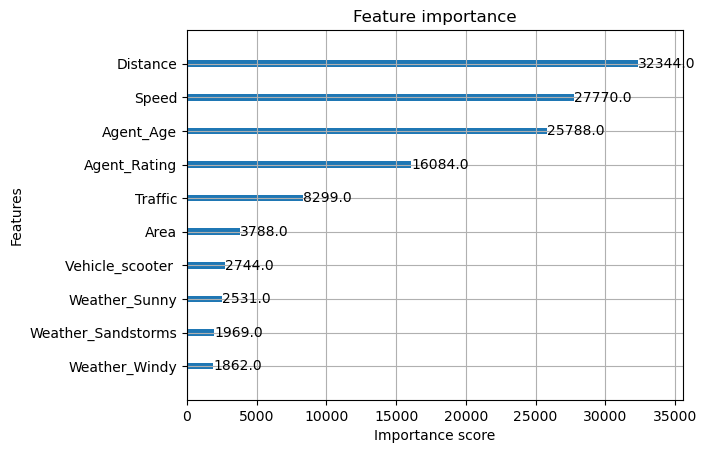

In [82]:
# Feature Importance
plot_importance(best_xgb, max_num_features=10)
plt.show()

## ***8.*** ***Future Work***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [83]:
# Save the model
joblib.dump(best_xgb, "xgb_model.pkl")

['xgb_model.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [84]:
# Load the model 
loaded_model = joblib.load("xgb_model.pkl")

import pandas as pd

# new data
test = x_test.head(3)
result = y_test.head(3)
test.head()

# Use it for prediction
y_pred = loaded_model.predict(test)
print(y_pred)
print(result)

[245.13815  89.95465 109.80417]
3885     245
12690     90
42745    110
Name: Delivery_Time, dtype: int64


# **Conclusion**

The project successfully achieved its objective of predicting Amazon delivery times with high accuracy. The findings revealed key factors influencing delivery duration, such as distance, area type, and agent performance. By leveraging the XGBoost model, the project not only demonstrated strong predictive power but also offered actionable insights that can guide operational decisions, resource allocation, and customer service improvements.

In conclusion, this project highlights the importance of integrating data-driven approaches in logistics and e-commerce, showing that machine learning can effectively enhance efficiency and support strategic planning in delivery management. Future work could explore incorporating real-time traffic data, weather conditions, and seasonal trends to further improve prediction accuracy.